# Q5

# Pix2Pix

# الف

Conditional Generative Adversarial Networks (CGANs) are an extension of traditional GANs (Generative Adversarial Networks) where both the generator and discriminator are conditioned on some additional information. This information can be labels, class identifiers, or any auxiliary data. By conditioning the network, CGANs can generate data corresponding to specific classes or characteristics.

# ب

## Applications
1. **Style Transfer**: Changing an image’s style (e.g., making it look like a painting).
2. **Image-to-Image Translation**: Converting satellite images to maps or sketches to realistic images.
3. **Domain Adaptation**: Modifying images from one condition (e.g., day) to another (e.g., night).

## References
1. Isola, P., et al. (2017). "Image-to-Image Translation with Conditional Adversarial Networks." *IEEE CVPR*.
2. Zhu, J.-Y., et al. (2017). "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks." *IEEE ICCV*.

# ج

## Pix2Pix
- **Type**: Paired image-to-image translation.
- **Generator**: Learns a mapping from an input image to an output image based on paired datasets.
- **Discriminator**: Distinguishes between real and generated image pairs.

## CycleGAN
- **Type**: Unpaired image-to-image translation.
- **Generator**: Works in two cycles (e.g., domain A to B and B to A) to ensure cycle consistency.
- **Discriminator**: Differentiates real images in each domain from generated images.

## Key Differences
1. **Data Requirement**: Pix2Pix requires paired datasets, while CycleGAN works with unpaired datasets.
2. **Use Case**: Pix2Pix is better suited for tasks like semantic segmentation, while CycleGAN is ideal for style transfer and domain adaptation without paired data.

# ه

## GAN
- **Input**: Random noise.  
- **Output**: Generates samples without any direct relation to input data.  
- **Structure**: No specific spatial relationships are preserved.

## Pix2Pix (cGAN)
- **Input**: A specific image (e.g., edges or labels).  
- **Output**: Translates the input into a corresponding output image.  
- **Generator**: Uses **U-Net** to preserve spatial details with skip connections.  
- **Discriminator**: Uses **PatchGAN** to focus on local patches for realism.

## Key Differences
- **GAN**: Unconditional generation (random noise → output).  
- **Pix2Pix**: Conditional image-to-image translation with structured outputs.  
- **Architecture**: Pix2Pix adds U-Net for spatial detail and PatchGAN for local realism.

#  و

## Discriminator in a Standard GAN
- **Input**: Entire image.
- **Output**: Determines if the image is real or fake.
- **Focus**: Evaluates global image features.

## Discriminator in Pix2Pix (PatchGAN)
- **Input**: Image patches (e.g., 70x70 patches).
- **Output**: Determines if each patch is real or fake.
- **Focus**: Focuses on local features and textures for realism.

## Key Differences
1. **Scope**:
   - Standard GAN: Evaluates the entire image at once.
   - Pix2Pix (PatchGAN): Evaluates smaller patches independently, allowing better focus on local details.
2. **Realism**:
   - PatchGAN helps maintain fine-grained details and texture, reducing artifacts.

## Performance Improvement
- PatchGAN's focus on local patches ensures sharp and realistic outputs, enhancing the overall quality of image-to-image translation.

# ز

## Generator Architecture (U-Net)
- **Architecture**: Encoder-decoder with skip connections.
  - **Encoder**: Series of convolutional layers to downsample the input image.
  - **Decoder**: Series of transposed convolutional layers to upsample and reconstruct the image.
  - **Skip Connections**: Links corresponding layers in the encoder and decoder to retain spatial details and reduce information loss.

## Input and Output Dimensions
- **Input**: High-resolution image grid.
- **Output**: High-resolution translated image grid.
- **Preservation**: Skip connections ensure the retention of structural features during translation.

## Use of DropOut
- **Purpose**: Adds noise to prevent overfitting and introduces minor randomness.
- **Implementation**: Applied on multiple layers during training and inference.
- **Effect on Results**: Helps generate diverse outputs but introduces only minor stochasticity due to its limited influence.

## Impact on Results
- **Preservation of Spatial Details**: The U-Net architecture ensures fine-grained details are retained.
- **Improved Diversity**: DropOut helps capture variability in the dataset, leading to better generalization.

#  ح

## Final Cost Function Based on the Architecture
- **Objective Function**:
  - Combines two terms:
    1. **Adversarial Loss**: 
       - Measures the difference between real and generated images.
       - Encourages realistic image outputs.
    2. **L1 Loss**:
       - Ensures the generated image is close to the ground truth in pixel space.
       - Reduces blurriness.

- **Formulation**:
  \[
  \text{Loss} = \min_G \max_D \left( L_{\text{cGAN}}(G, D) + \lambda L_1(G) \right)
  \]
  - **\(L_{\text{cGAN}}\)**: Adversarial loss for the conditional GAN.
  - **\(L_1\)**: L1 pixel-wise distance.
  - **\(\lambda\)**: Balances the weight between adversarial and L1 losses.

## Weight Updates for Subcomponents
1. **Discriminator (D)**:
   - Updated to maximize the probability of correctly classifying real and fake images.
   - Focuses on distinguishing fake outputs from real ones.

2. **Generator (G)**:
   - Trained to minimize the adversarial loss by fooling the discriminator.
   - Simultaneously minimizes the L1 loss to ensure the generated image matches the ground truth.

## Overall Architecture Impact
- The combination of **local realism** (via adversarial loss) and **global accuracy** (via L1 loss) ensures high-quality outputs while maintaining spatial coherence.

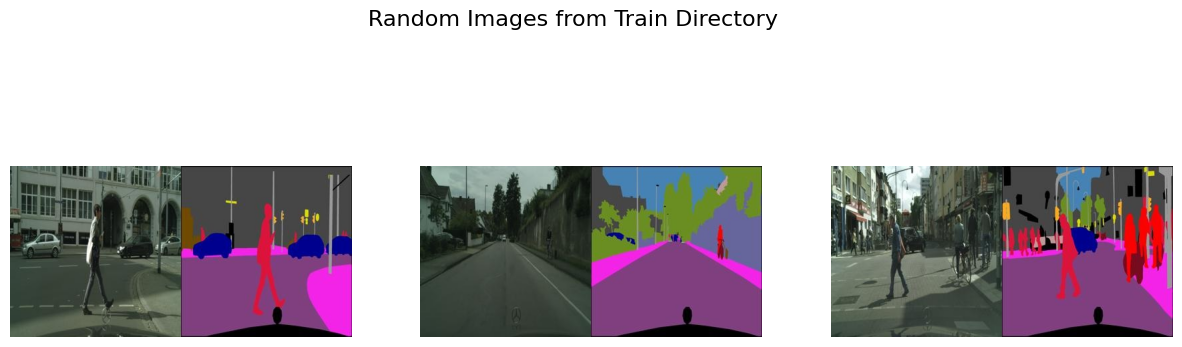

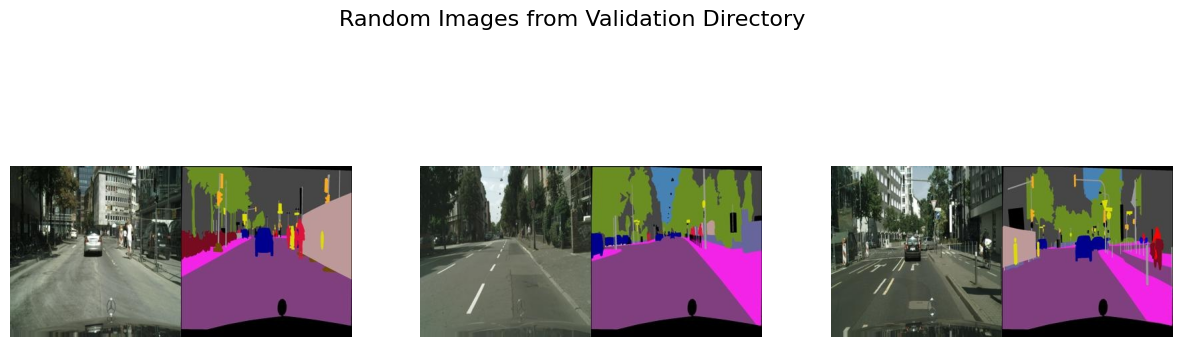

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def get_random_images_from_dir(directory, num_images=3):
    """
    Randomly selects a specified number of images from a directory.

    Args:
        directory (str): Path to the directory containing images.
        num_images (int): Number of random images to select.

    Returns:
        List of file paths to the randomly selected images.
    """
    all_images = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    return random.sample(all_images, num_images)

def display_images(image_paths, title):
    """
    Displays images in a row.

    Args:
        image_paths (list): List of file paths to the images.
        title (str): Title for the displayed set of images.
    """
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for ax, image_path in zip(axes, image_paths):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

train_dir = '/kaggle/input/cityscapes-pix2pix-dataset/train'
val_dir = '/kaggle/input/cityscapes-pix2pix-dataset/val'

train_images = get_random_images_from_dir(train_dir, num_images=3)
val_images = get_random_images_from_dir(val_dir, num_images=3)

display_images(train_images, title="Random Images from Train Directory")
display_images(val_images, title="Random Images from Validation Directory")


# ب

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
import numpy as np
import torch.optim as optim

# =====================
# Initialize Weights
# =====================
def initialize_weights(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# =====================
# Define Network Blocks
# =====================
class Downsample(nn.Module):
    """
    Downsample block: Convolution => BatchNorm => LeakyReLU
    """
    def __init__(self, in_channels, out_channels, apply_batchnorm=True):
        super(Downsample, self).__init__()
        layers = []
        # Strided convolution to downsample
        layers.append(
            nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False)
        )
        if apply_batchnorm:
            layers.append(nn.BatchNorm2d(out_channels))
        layers.append(nn.LeakyReLU(0.2, inplace=True))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

class Upsample(nn.Module):
    """
    Upsample block: Transposed Convolution => BatchNorm => ReLU => Dropout (optional)
    """
    def __init__(self, in_channels, out_channels, apply_dropout=False):
        super(Upsample, self).__init__()
        layers = []
        # Transposed convolution to upsample
        layers.append(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False)
        )
        layers.append(nn.BatchNorm2d(out_channels))
        if apply_dropout:
            layers.append(nn.Dropout(0.5))
        layers.append(nn.ReLU(inplace=True))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# =====================
# Generator: U-Net
# =====================
class GeneratorUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(GeneratorUNet, self).__init__()
        
        # Encoder: Downsampling layers
        self.down1 = Downsample(in_channels, 64, apply_batchnorm=False)   # (B, 64, H/2, W/2)
        self.down2 = Downsample(64, 128)                                  # (B, 128, H/4, W/4)
        self.down3 = Downsample(128, 256)                                 # (B, 256, H/8, W/8)
        self.down4 = Downsample(256, 512)                                 # (B, 512, H/16, W/16)
        self.down5 = Downsample(512, 512)                                 # (B, 512, H/32, W/32)
        self.down6 = Downsample(512, 512)                                 # (B, 512, H/64, W/64)
        self.down7 = Downsample(512, 512)                                 # (B, 512, H/128, W/128)
        self.down8 = Downsample(512, 512, apply_batchnorm=False)          # Bottleneck
        
        # Decoder: Upsampling layers
        self.up1 = Upsample(512, 512, apply_dropout=True)                # (B, 512, H/64, W/64)
        self.up2 = Upsample(1024, 512, apply_dropout=True)               # (B, 512, H/32, W/32)
        self.up3 = Upsample(1024, 512, apply_dropout=True)               # (B, 512, H/16, W/16)
        self.up4 = Upsample(1024, 512, apply_dropout=True)               # (B, 512, H/8, W/8)
        self.up5 = Upsample(1024, 256, apply_dropout=False)              # (B, 256, H/4, W/4)
        self.up6 = Upsample(512, 128, apply_dropout=False)               # (B, 128, H/2, W/2)
        self.up7 = Upsample(256, 64, apply_dropout=False)                # (B, 64, H, W)
        
        # Final layer: Transposed convolution to get the output image
        self.final = nn.Sequential(
            nn.ConvTranspose2d(128, out_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()  # Output values between [-1, 1]
        )
        
        # Initialize weights
        self.apply(initialize_weights)
    
    def forward(self, x):
        # Encoder
        d1 = self.down1(x)   # (B, 64, H/2, W/2)
        d2 = self.down2(d1)  # (B, 128, H/4, W/4)
        d3 = self.down3(d2)  # (B, 256, H/8, W/8)
        d4 = self.down4(d3)  # (B, 512, H/16, W/16)
        d5 = self.down5(d4)  # (B, 512, H/32, W/32)
        d6 = self.down6(d5)  # (B, 512, H/64, W/64)
        d7 = self.down7(d6)  # (B, 512, H/128, W/128)
        d8 = self.down8(d7)  # (B, 512, H/256, W/256)
        
        # Decoder with skip connections
        u1 = self.up1(d8)     # (B, 512, H/128, W/128)
        u1 = torch.cat([u1, d7], dim=1)  # (B, 1024, H/128, W/128)
        
        u2 = self.up2(u1)     # (B, 512, H/64, W/64)
        u2 = torch.cat([u2, d6], dim=1)  # (B, 1024, H/64, W/64)
        
        u3 = self.up3(u2)     # (B, 512, H/32, W/32)
        u3 = torch.cat([u3, d5], dim=1)  # (B, 1024, H/32, W/32)
        
        u4 = self.up4(u3)     # (B, 512, H/16, W/16)
        u4 = torch.cat([u4, d4], dim=1)  # (B, 1024, H/16, W/16)
        
        u5 = self.up5(u4)     # (B, 256, H/8, W/8)
        u5 = torch.cat([u5, d3], dim=1)  # (B, 512, H/8, W/8)
        
        u6 = self.up6(u5)     # (B, 128, H/4, W/4)
        u6 = torch.cat([u6, d2], dim=1)  # (B, 256, H/4, W/4)
        
        u7 = self.up7(u6)     # (B, 64, H/2, W/2)
        u7 = torch.cat([u7, d1], dim=1)  # (B, 128, H/2, W/2)
        
        output = self.final(u7)  # (B, out_channels, H, W)
        
        return output

# =====================
# Discriminator
# =====================
class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super(Discriminator, self).__init__()
        
        # PatchGAN: Convolution layers to classify each patch as real or fake
        self.model = nn.Sequential(
            nn.Conv2d(in_channels * 2, 64, kernel_size=4, stride=2, padding=1),  # Input + generated image
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1)  # Output single scalar (real or fake)
        )
        
        # Initialize weights
        self.apply(initialize_weights)
    
    def forward(self, x, y):
        # Concatenate the input image (x) with the generated image (y) along the channel dimension
        input_data = torch.cat([x, y], dim=1)
        return self.model(input_data)

# =====================
# Define Loss Functions
# =====================
def discriminator_loss(real_output, fake_output):
    """
    Calculate the discriminator loss. The discriminator tries to maximize the probability of real and fake classifications.
    """
    real_loss = F.binary_cross_entropy_with_logits(real_output, torch.ones_like(real_output))
    fake_loss = F.binary_cross_entropy_with_logits(fake_output, torch.zeros_like(fake_output))
    return (real_loss + fake_loss) / 2

def generator_loss(fake_output):
    """
    Calculate the generator loss. The generator tries to minimize the difference between fake output and the target labels (real).
    """
    return F.binary_cross_entropy_with_logits(fake_output, torch.ones_like(fake_output))

def l1_loss_fn(generated_image, target_image, lambda_l1=100.0):
    """
    Calculate the L1 loss between the generated image and the target image.
    This loss ensures that the generated image is close to the ground truth in pixel space.
    """
    return lambda_l1 * F.l1_loss(generated_image, target_image)

def combined_loss(generator, discriminator, real_images, target_images, lambda_l1=100.0):
    """
    Combines the adversarial loss and the L1 loss to update the generator and discriminator.
    """
    # Generate fake images from the generator
    fake_images = generator(real_images)
    
    # Discriminator outputs for real and fake images
    real_output = discriminator(real_images, target_images)
    fake_output = discriminator(real_images, fake_images.detach())  # Don't update generator yet
    
    # Calculate losses
    g_loss = generator_loss(fake_output) + l1_loss_fn(fake_images, target_images, lambda_l1)
    d_loss = discriminator_loss(real_output, fake_output)
    
    return g_loss, d_loss

In [ ]:
# =====================
# Dataset and DataLoader
# =====================
class ImageDataset(Dataset):
    def __init__(self, root, transforms_=None, mode="train"):
        self.transform = transforms.Compose(transforms_)
        self.files = sorted(glob.glob(os.path.join(root, mode) + "/*.*"))
        if debug_mode:
            self.files = self.files[:100]

    def __getitem__(self, index):
        img = Image.open(self.files[index % len(self.files)]).convert('RGB')  # Ensure RGB
        w, h = img.size
        img_A = img.crop((0, 0, w / 2, h))
        img_B = img.crop((w / 2, 0, w, h))

        if np.random.random() < 0.5:
            img_A = img_A.transpose(Image.FLIP_LEFT_RIGHT)
            img_B = img_B.transpose(Image.FLIP_LEFT_RIGHT)

        img_A = self.transform(img_A)
        img_B = self.transform(img_B)

        return {"A": img_A, "B": img_B}

    def __len__(self):
        return len(self.files)


In [ ]:
# =====================
# Configuration Parameters
# =====================
dataset_path = "../input/cityscapes-pix2pix-dataset"
batch_size = 4
lr = 0.0001
b1 = 0.5
b2 = 0.999
decay_epoch = 1
n_workers = 8
img_height = 256
img_width = 256
channels = 3
sample_interval = 100
checkpoint_interval = 10  # Changed from -1 to 10 for regular checkpoints
n_residual_blocks = 9
lambda_cyc = 10.0
lambda_id = 5.0
debug_mode = False
num_epochs = 50
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Enhanced device selection

# =====================
# Image Transformations
# =====================
transforms_ = [
    transforms.Resize((img_height, img_width), Image.BICUBIC),
    transforms.ToTensor(),
]

# =====================
# DataLoaders
# =====================
train_dataloader = DataLoader(
    ImageDataset(f"{dataset_path}", transforms_=transforms_),
    batch_size=batch_size,
    shuffle=True,
    num_workers=n_workers,
)

test_dataloader = DataLoader(
    ImageDataset(f"{dataset_path}", transforms_=transforms_, mode="val"),
    batch_size=1,
    shuffle=True,
    num_workers=1,
)


  0%|          | 2/744 [00:00<03:42,  3.33it/s]

Epoch [1/50], Step [0/744]
D Loss: 0.8265, G Total Loss: 41.7423, G Adv Loss: 1.0262, G L1 Loss: 40.7161


 14%|█▎        | 102/744 [00:16<01:44,  6.17it/s]

Epoch [1/50], Step [100/744]
D Loss: 0.5805, G Total Loss: 17.2929, G Adv Loss: 2.3512, G L1 Loss: 14.9417


 27%|██▋       | 202/744 [00:33<01:31,  5.92it/s]

Epoch [1/50], Step [200/744]
D Loss: 0.3131, G Total Loss: 13.1072, G Adv Loss: 1.8257, G L1 Loss: 11.2815


 41%|████      | 302/744 [00:50<01:16,  5.80it/s]

Epoch [1/50], Step [300/744]
D Loss: 0.3920, G Total Loss: 15.3531, G Adv Loss: 1.5109, G L1 Loss: 13.8422


 54%|█████▍    | 402/744 [01:08<01:02,  5.47it/s]

Epoch [1/50], Step [400/744]
D Loss: 0.3287, G Total Loss: 13.9833, G Adv Loss: 1.3256, G L1 Loss: 12.6577


 67%|██████▋   | 502/744 [01:26<00:46,  5.21it/s]

Epoch [1/50], Step [500/744]
D Loss: 0.2849, G Total Loss: 15.2507, G Adv Loss: 2.2477, G L1 Loss: 13.0030


 81%|████████  | 602/744 [01:46<00:27,  5.19it/s]

Epoch [1/50], Step [600/744]
D Loss: 0.5724, G Total Loss: 9.9415, G Adv Loss: 1.0365, G L1 Loss: 8.9050


 94%|█████████▍| 702/744 [02:04<00:07,  5.49it/s]

Epoch [1/50], Step [700/744]
D Loss: 0.3290, G Total Loss: 15.5775, G Adv Loss: 1.9552, G L1 Loss: 13.6223


  0%|          | 2/744 [00:00<02:40,  4.62it/s]

Epoch [2/50], Step [0/744]
D Loss: 0.4252, G Total Loss: 13.0896, G Adv Loss: 1.6402, G L1 Loss: 11.4494


 14%|█▎        | 102/744 [00:18<01:56,  5.50it/s]

Epoch [2/50], Step [100/744]
D Loss: 0.7564, G Total Loss: 11.6995, G Adv Loss: 1.2086, G L1 Loss: 10.4909


 27%|██▋       | 202/744 [00:37<01:41,  5.33it/s]

Epoch [2/50], Step [200/744]
D Loss: 0.3825, G Total Loss: 13.9518, G Adv Loss: 1.6815, G L1 Loss: 12.2702


 41%|████      | 302/744 [00:55<01:21,  5.40it/s]

Epoch [2/50], Step [300/744]
D Loss: 0.7859, G Total Loss: 11.2054, G Adv Loss: 0.9797, G L1 Loss: 10.2257


 54%|█████▍    | 402/744 [01:14<01:02,  5.49it/s]

Epoch [2/50], Step [400/744]
D Loss: 0.5001, G Total Loss: 11.6293, G Adv Loss: 1.0373, G L1 Loss: 10.5920


 67%|██████▋   | 502/744 [01:32<00:43,  5.50it/s]

Epoch [2/50], Step [500/744]
D Loss: 0.3486, G Total Loss: 13.2791, G Adv Loss: 1.3210, G L1 Loss: 11.9582


 81%|████████  | 602/744 [01:50<00:25,  5.49it/s]

Epoch [2/50], Step [600/744]
D Loss: 0.7626, G Total Loss: 12.1725, G Adv Loss: 1.0401, G L1 Loss: 11.1324


 94%|█████████▍| 702/744 [02:08<00:07,  5.45it/s]

Epoch [2/50], Step [700/744]
D Loss: 0.4771, G Total Loss: 13.9237, G Adv Loss: 2.0822, G L1 Loss: 11.8416


  0%|          | 2/744 [00:00<02:47,  4.43it/s]

Epoch [3/50], Step [0/744]
D Loss: 0.7999, G Total Loss: 10.8406, G Adv Loss: 0.9340, G L1 Loss: 9.9066


 14%|█▎        | 102/744 [00:18<01:57,  5.44it/s]

Epoch [3/50], Step [100/744]
D Loss: 0.5867, G Total Loss: 11.9417, G Adv Loss: 1.0059, G L1 Loss: 10.9358


 27%|██▋       | 202/744 [00:37<01:40,  5.37it/s]

Epoch [3/50], Step [200/744]
D Loss: 0.4363, G Total Loss: 9.6693, G Adv Loss: 1.3044, G L1 Loss: 8.3649


 41%|████      | 302/744 [00:56<01:21,  5.39it/s]

Epoch [3/50], Step [300/744]
D Loss: 0.5670, G Total Loss: 13.7090, G Adv Loss: 1.7224, G L1 Loss: 11.9866


 54%|█████▍    | 402/744 [01:14<01:03,  5.41it/s]

Epoch [3/50], Step [400/744]
D Loss: 0.9325, G Total Loss: 10.2781, G Adv Loss: 0.8505, G L1 Loss: 9.4275


 67%|██████▋   | 502/744 [01:32<00:44,  5.40it/s]

Epoch [3/50], Step [500/744]
D Loss: 0.8055, G Total Loss: 14.4107, G Adv Loss: 1.4021, G L1 Loss: 13.0086


 81%|████████  | 602/744 [01:51<00:25,  5.49it/s]

Epoch [3/50], Step [600/744]
D Loss: 0.6332, G Total Loss: 11.9178, G Adv Loss: 0.6759, G L1 Loss: 11.2419


 94%|█████████▍| 702/744 [02:09<00:07,  5.43it/s]

Epoch [3/50], Step [700/744]
D Loss: 0.3674, G Total Loss: 13.2890, G Adv Loss: 1.2093, G L1 Loss: 12.0797


  0%|          | 2/744 [00:00<02:54,  4.25it/s]

Epoch [4/50], Step [0/744]
D Loss: 0.5364, G Total Loss: 10.1591, G Adv Loss: 1.3789, G L1 Loss: 8.7802


 14%|█▎        | 102/744 [00:18<01:59,  5.39it/s]

Epoch [4/50], Step [100/744]
D Loss: 0.7130, G Total Loss: 10.1985, G Adv Loss: 0.9749, G L1 Loss: 9.2235


 27%|██▋       | 202/744 [00:37<01:39,  5.43it/s]

Epoch [4/50], Step [200/744]
D Loss: 0.4591, G Total Loss: 10.5528, G Adv Loss: 1.0188, G L1 Loss: 9.5340


 41%|████      | 302/744 [00:55<01:20,  5.50it/s]

Epoch [4/50], Step [300/744]
D Loss: 0.2760, G Total Loss: 14.6296, G Adv Loss: 1.6598, G L1 Loss: 12.9698


 54%|█████▍    | 402/744 [01:13<01:03,  5.39it/s]

Epoch [4/50], Step [400/744]
D Loss: 0.3491, G Total Loss: 13.9640, G Adv Loss: 1.7163, G L1 Loss: 12.2477


 67%|██████▋   | 502/744 [01:32<00:44,  5.48it/s]

Epoch [4/50], Step [500/744]
D Loss: 0.3434, G Total Loss: 11.2224, G Adv Loss: 1.2224, G L1 Loss: 10.0000


 81%|████████  | 602/744 [01:50<00:25,  5.51it/s]

Epoch [4/50], Step [600/744]
D Loss: 0.6732, G Total Loss: 15.0294, G Adv Loss: 1.2548, G L1 Loss: 13.7745


 94%|█████████▍| 702/744 [02:08<00:07,  5.48it/s]

Epoch [4/50], Step [700/744]
D Loss: 0.3752, G Total Loss: 15.3384, G Adv Loss: 1.3667, G L1 Loss: 13.9717


  0%|          | 2/744 [00:00<02:56,  4.22it/s]

Epoch [5/50], Step [0/744]
D Loss: 1.0343, G Total Loss: 12.4427, G Adv Loss: 0.6471, G L1 Loss: 11.7956


 14%|█▎        | 102/744 [00:18<01:57,  5.45it/s]

Epoch [5/50], Step [100/744]
D Loss: 0.1989, G Total Loss: 14.1014, G Adv Loss: 2.0053, G L1 Loss: 12.0960


 27%|██▋       | 202/744 [00:37<01:41,  5.34it/s]

Epoch [5/50], Step [200/744]
D Loss: 0.4872, G Total Loss: 13.0411, G Adv Loss: 1.5209, G L1 Loss: 11.5201


 41%|████      | 302/744 [00:56<01:21,  5.41it/s]

Epoch [5/50], Step [300/744]
D Loss: 0.2141, G Total Loss: 11.9296, G Adv Loss: 2.1122, G L1 Loss: 9.8175


 54%|█████▍    | 402/744 [01:14<01:02,  5.49it/s]

Epoch [5/50], Step [400/744]
D Loss: 0.5581, G Total Loss: 11.7625, G Adv Loss: 0.9728, G L1 Loss: 10.7897


 67%|██████▋   | 502/744 [01:32<00:43,  5.51it/s]

Epoch [5/50], Step [500/744]
D Loss: 0.8269, G Total Loss: 10.3106, G Adv Loss: 1.4406, G L1 Loss: 8.8700


 81%|████████  | 602/744 [01:50<00:25,  5.47it/s]

Epoch [5/50], Step [600/744]
D Loss: 0.4403, G Total Loss: 14.1846, G Adv Loss: 1.6921, G L1 Loss: 12.4925


 94%|█████████▍| 702/744 [02:09<00:07,  5.38it/s]

Epoch [5/50], Step [700/744]
D Loss: 0.4891, G Total Loss: 13.6345, G Adv Loss: 1.2429, G L1 Loss: 12.3916


  0%|          | 2/744 [00:00<03:05,  4.00it/s]

Epoch [6/50], Step [0/744]
D Loss: 0.3370, G Total Loss: 12.8398, G Adv Loss: 1.9003, G L1 Loss: 10.9395


 14%|█▎        | 102/744 [00:18<01:57,  5.46it/s]

Epoch [6/50], Step [100/744]
D Loss: 0.4445, G Total Loss: 13.5231, G Adv Loss: 1.2640, G L1 Loss: 12.2592


 27%|██▋       | 202/744 [00:37<01:39,  5.47it/s]

Epoch [6/50], Step [200/744]
D Loss: 0.4972, G Total Loss: 13.4031, G Adv Loss: 1.0600, G L1 Loss: 12.3431


 41%|████      | 302/744 [00:55<01:20,  5.49it/s]

Epoch [6/50], Step [300/744]
D Loss: 0.2362, G Total Loss: 13.8493, G Adv Loss: 1.8839, G L1 Loss: 11.9654


 54%|█████▍    | 402/744 [01:14<01:03,  5.43it/s]

Epoch [6/50], Step [400/744]
D Loss: 0.6358, G Total Loss: 10.8396, G Adv Loss: 0.7668, G L1 Loss: 10.0728


 67%|██████▋   | 502/744 [01:32<00:44,  5.44it/s]

Epoch [6/50], Step [500/744]
D Loss: 0.2449, G Total Loss: 14.4733, G Adv Loss: 1.7936, G L1 Loss: 12.6796


 81%|████████  | 602/744 [01:50<00:25,  5.49it/s]

Epoch [6/50], Step [600/744]
D Loss: 0.5900, G Total Loss: 13.5079, G Adv Loss: 1.8142, G L1 Loss: 11.6937


 94%|█████████▍| 702/744 [02:09<00:07,  5.45it/s]

Epoch [6/50], Step [700/744]
D Loss: 0.4125, G Total Loss: 13.4030, G Adv Loss: 1.2713, G L1 Loss: 12.1318


  0%|          | 2/744 [00:00<02:47,  4.44it/s]

Epoch [7/50], Step [0/744]
D Loss: 0.4221, G Total Loss: 13.2878, G Adv Loss: 1.5463, G L1 Loss: 11.7414


 14%|█▎        | 102/744 [00:18<01:58,  5.43it/s]

Epoch [7/50], Step [100/744]
D Loss: 0.2911, G Total Loss: 13.0986, G Adv Loss: 1.8088, G L1 Loss: 11.2899


 27%|██▋       | 202/744 [00:37<01:41,  5.32it/s]

Epoch [7/50], Step [200/744]
D Loss: 0.2473, G Total Loss: 12.2430, G Adv Loss: 1.5659, G L1 Loss: 10.6771


 41%|████      | 302/744 [00:56<01:22,  5.37it/s]

Epoch [7/50], Step [300/744]
D Loss: 0.5427, G Total Loss: 11.9325, G Adv Loss: 1.4731, G L1 Loss: 10.4594


 54%|█████▍    | 402/744 [01:14<01:03,  5.40it/s]

Epoch [7/50], Step [400/744]
D Loss: 0.2738, G Total Loss: 13.1688, G Adv Loss: 1.9376, G L1 Loss: 11.2312


 67%|██████▋   | 502/744 [01:33<00:44,  5.48it/s]

Epoch [7/50], Step [500/744]
D Loss: 0.5080, G Total Loss: 12.7677, G Adv Loss: 1.5667, G L1 Loss: 11.2010


 81%|████████  | 602/744 [01:51<00:25,  5.50it/s]

Epoch [7/50], Step [600/744]
D Loss: 0.4275, G Total Loss: 14.2058, G Adv Loss: 1.1706, G L1 Loss: 13.0352


 94%|█████████▍| 702/744 [02:09<00:07,  5.40it/s]

Epoch [7/50], Step [700/744]
D Loss: 0.3367, G Total Loss: 11.5112, G Adv Loss: 1.5473, G L1 Loss: 9.9639


  0%|          | 2/744 [00:00<02:56,  4.21it/s]

Epoch [8/50], Step [0/744]
D Loss: 0.5865, G Total Loss: 10.4897, G Adv Loss: 0.7372, G L1 Loss: 9.7525


 14%|█▎        | 102/744 [00:19<02:01,  5.29it/s]

Epoch [8/50], Step [100/744]
D Loss: 0.2813, G Total Loss: 13.5239, G Adv Loss: 2.0323, G L1 Loss: 11.4916


 27%|██▋       | 202/744 [00:37<01:39,  5.44it/s]

Epoch [8/50], Step [200/744]
D Loss: 0.3270, G Total Loss: 13.2354, G Adv Loss: 1.6351, G L1 Loss: 11.6003


 41%|████      | 302/744 [00:56<01:20,  5.51it/s]

Epoch [8/50], Step [300/744]
D Loss: 0.3479, G Total Loss: 10.3739, G Adv Loss: 1.2361, G L1 Loss: 9.1378


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [8/50], Step [400/744]
D Loss: 0.3441, G Total Loss: 13.6269, G Adv Loss: 1.8581, G L1 Loss: 11.7688


 67%|██████▋   | 502/744 [01:33<00:45,  5.35it/s]

Epoch [8/50], Step [500/744]
D Loss: 0.3594, G Total Loss: 12.6158, G Adv Loss: 1.3999, G L1 Loss: 11.2159


 81%|████████  | 602/744 [01:51<00:26,  5.39it/s]

Epoch [8/50], Step [600/744]
D Loss: 0.3847, G Total Loss: 10.3489, G Adv Loss: 1.5585, G L1 Loss: 8.7904


 94%|█████████▍| 702/744 [02:09<00:07,  5.50it/s]

Epoch [8/50], Step [700/744]
D Loss: 0.2436, G Total Loss: 14.2166, G Adv Loss: 1.9063, G L1 Loss: 12.3103


  0%|          | 2/744 [00:00<02:51,  4.34it/s]

Epoch [9/50], Step [0/744]
D Loss: 0.7435, G Total Loss: 11.6462, G Adv Loss: 0.8808, G L1 Loss: 10.7653


 14%|█▎        | 102/744 [00:18<01:59,  5.39it/s]

Epoch [9/50], Step [100/744]
D Loss: 0.6330, G Total Loss: 9.6714, G Adv Loss: 0.8324, G L1 Loss: 8.8390


 27%|██▋       | 202/744 [00:37<01:41,  5.32it/s]

Epoch [9/50], Step [200/744]
D Loss: 0.2529, G Total Loss: 11.8911, G Adv Loss: 1.7173, G L1 Loss: 10.1737


 41%|████      | 302/744 [00:56<01:22,  5.39it/s]

Epoch [9/50], Step [300/744]
D Loss: 0.5712, G Total Loss: 14.0524, G Adv Loss: 1.3188, G L1 Loss: 12.7336


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [9/50], Step [400/744]
D Loss: 0.4000, G Total Loss: 11.8565, G Adv Loss: 1.6536, G L1 Loss: 10.2029


 67%|██████▋   | 502/744 [01:32<00:44,  5.46it/s]

Epoch [9/50], Step [500/744]
D Loss: 0.2069, G Total Loss: 12.2796, G Adv Loss: 1.9528, G L1 Loss: 10.3268


 81%|████████  | 602/744 [01:50<00:25,  5.48it/s]

Epoch [9/50], Step [600/744]
D Loss: 0.6021, G Total Loss: 11.5276, G Adv Loss: 1.1347, G L1 Loss: 10.3929


 94%|█████████▍| 702/744 [02:09<00:07,  5.50it/s]

Epoch [9/50], Step [700/744]
D Loss: 0.6759, G Total Loss: 10.1579, G Adv Loss: 0.6706, G L1 Loss: 9.4873


  0%|          | 2/744 [00:00<03:01,  4.08it/s]

Epoch [10/50], Step [0/744]
D Loss: 0.7981, G Total Loss: 10.9690, G Adv Loss: 1.2349, G L1 Loss: 9.7342


 14%|█▎        | 102/744 [00:18<01:57,  5.45it/s]

Epoch [10/50], Step [100/744]
D Loss: 0.3137, G Total Loss: 13.9641, G Adv Loss: 1.8929, G L1 Loss: 12.0712


 27%|██▋       | 202/744 [00:37<01:41,  5.32it/s]

Epoch [10/50], Step [200/744]
D Loss: 0.2606, G Total Loss: 14.1476, G Adv Loss: 2.1021, G L1 Loss: 12.0455


 41%|████      | 302/744 [00:55<01:20,  5.47it/s]

Epoch [10/50], Step [300/744]
D Loss: 0.3657, G Total Loss: 11.8683, G Adv Loss: 1.1150, G L1 Loss: 10.7533


 54%|█████▍    | 402/744 [01:14<01:02,  5.51it/s]

Epoch [10/50], Step [400/744]
D Loss: 0.5155, G Total Loss: 11.8431, G Adv Loss: 1.1887, G L1 Loss: 10.6544


 67%|██████▋   | 502/744 [01:32<00:44,  5.48it/s]

Epoch [10/50], Step [500/744]
D Loss: 0.4119, G Total Loss: 11.2014, G Adv Loss: 1.3349, G L1 Loss: 9.8665


 81%|████████  | 602/744 [01:50<00:26,  5.37it/s]

Epoch [10/50], Step [600/744]
D Loss: 0.5479, G Total Loss: 13.2427, G Adv Loss: 1.4819, G L1 Loss: 11.7607


 94%|█████████▍| 702/744 [02:09<00:07,  5.36it/s]

Epoch [10/50], Step [700/744]
D Loss: 0.1214, G Total Loss: 19.1902, G Adv Loss: 2.9567, G L1 Loss: 16.2336


100%|██████████| 744/744 [02:17<00:00,  5.41it/s]


Saved models at epoch 10


  0%|          | 2/744 [00:00<02:51,  4.33it/s]

Epoch [11/50], Step [0/744]
D Loss: 0.6782, G Total Loss: 9.6864, G Adv Loss: 1.1034, G L1 Loss: 8.5830


 14%|█▎        | 102/744 [00:19<01:59,  5.38it/s]

Epoch [11/50], Step [100/744]
D Loss: 0.1474, G Total Loss: 14.6940, G Adv Loss: 2.0023, G L1 Loss: 12.6917


 27%|██▋       | 202/744 [00:37<01:40,  5.40it/s]

Epoch [11/50], Step [200/744]
D Loss: 0.3627, G Total Loss: 10.6667, G Adv Loss: 1.5052, G L1 Loss: 9.1614


 41%|████      | 302/744 [00:56<01:21,  5.44it/s]

Epoch [11/50], Step [300/744]
D Loss: 0.4421, G Total Loss: 13.5619, G Adv Loss: 1.3601, G L1 Loss: 12.2019


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [11/50], Step [400/744]
D Loss: 0.2773, G Total Loss: 12.4211, G Adv Loss: 1.8858, G L1 Loss: 10.5353


 67%|██████▋   | 502/744 [01:33<00:44,  5.38it/s]

Epoch [11/50], Step [500/744]
D Loss: 0.5512, G Total Loss: 10.7327, G Adv Loss: 0.8612, G L1 Loss: 9.8715


 81%|████████  | 602/744 [01:51<00:26,  5.45it/s]

Epoch [11/50], Step [600/744]
D Loss: 0.2121, G Total Loss: 13.2307, G Adv Loss: 2.2035, G L1 Loss: 11.0272


 94%|█████████▍| 702/744 [02:10<00:07,  5.43it/s]

Epoch [11/50], Step [700/744]
D Loss: 0.2385, G Total Loss: 12.7313, G Adv Loss: 2.1186, G L1 Loss: 10.6127


  0%|          | 2/744 [00:00<02:59,  4.13it/s]

Epoch [12/50], Step [0/744]
D Loss: 0.3643, G Total Loss: 11.5094, G Adv Loss: 1.9358, G L1 Loss: 9.5736


 14%|█▎        | 102/744 [00:18<02:00,  5.34it/s]

Epoch [12/50], Step [100/744]
D Loss: 0.4324, G Total Loss: 12.5596, G Adv Loss: 1.6547, G L1 Loss: 10.9049


 27%|██▋       | 202/744 [00:37<01:39,  5.47it/s]

Epoch [12/50], Step [200/744]
D Loss: 0.4082, G Total Loss: 11.5552, G Adv Loss: 1.3112, G L1 Loss: 10.2440


 41%|████      | 302/744 [00:55<01:21,  5.45it/s]

Epoch [12/50], Step [300/744]
D Loss: 0.7460, G Total Loss: 11.9550, G Adv Loss: 0.4170, G L1 Loss: 11.5380


 54%|█████▍    | 402/744 [01:14<01:03,  5.42it/s]

Epoch [12/50], Step [400/744]
D Loss: 0.6230, G Total Loss: 9.9687, G Adv Loss: 0.9072, G L1 Loss: 9.0614


 67%|██████▋   | 502/744 [01:32<00:44,  5.50it/s]

Epoch [12/50], Step [500/744]
D Loss: 0.1755, G Total Loss: 12.7729, G Adv Loss: 1.8008, G L1 Loss: 10.9721


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [12/50], Step [600/744]
D Loss: 0.3034, G Total Loss: 11.5122, G Adv Loss: 1.3359, G L1 Loss: 10.1764


 94%|█████████▍| 702/744 [02:09<00:07,  5.49it/s]

Epoch [12/50], Step [700/744]
D Loss: 0.6628, G Total Loss: 13.4730, G Adv Loss: 1.2100, G L1 Loss: 12.2630


  0%|          | 2/744 [00:00<02:57,  4.18it/s]

Epoch [13/50], Step [0/744]
D Loss: 0.7068, G Total Loss: 9.5961, G Adv Loss: 1.0379, G L1 Loss: 8.5582


 14%|█▎        | 102/744 [00:19<02:00,  5.34it/s]

Epoch [13/50], Step [100/744]
D Loss: 0.5520, G Total Loss: 7.9844, G Adv Loss: 0.9862, G L1 Loss: 6.9981


 27%|██▋       | 202/744 [00:37<01:40,  5.39it/s]

Epoch [13/50], Step [200/744]
D Loss: 0.4377, G Total Loss: 11.3728, G Adv Loss: 1.5553, G L1 Loss: 9.8176


 41%|████      | 302/744 [00:56<01:20,  5.50it/s]

Epoch [13/50], Step [300/744]
D Loss: 0.5177, G Total Loss: 11.1305, G Adv Loss: 1.3982, G L1 Loss: 9.7323


 54%|█████▍    | 402/744 [01:14<01:02,  5.46it/s]

Epoch [13/50], Step [400/744]
D Loss: 0.3184, G Total Loss: 11.7931, G Adv Loss: 1.7408, G L1 Loss: 10.0523


 67%|██████▋   | 502/744 [01:32<00:44,  5.49it/s]

Epoch [13/50], Step [500/744]
D Loss: 0.5551, G Total Loss: 11.7559, G Adv Loss: 1.9673, G L1 Loss: 9.7886


 81%|████████  | 602/744 [01:50<00:25,  5.46it/s]

Epoch [13/50], Step [600/744]
D Loss: 0.3698, G Total Loss: 11.2753, G Adv Loss: 1.6914, G L1 Loss: 9.5839


 94%|█████████▍| 702/744 [02:09<00:07,  5.35it/s]

Epoch [13/50], Step [700/744]
D Loss: 0.7796, G Total Loss: 10.0795, G Adv Loss: 1.4228, G L1 Loss: 8.6566


  0%|          | 2/744 [00:00<02:47,  4.44it/s]

Epoch [14/50], Step [0/744]
D Loss: 0.2499, G Total Loss: 13.6016, G Adv Loss: 2.6495, G L1 Loss: 10.9521


 14%|█▎        | 102/744 [00:18<01:58,  5.42it/s]

Epoch [14/50], Step [100/744]
D Loss: 0.6070, G Total Loss: 8.6245, G Adv Loss: 0.8554, G L1 Loss: 7.7692


 27%|██▋       | 202/744 [00:37<01:38,  5.49it/s]

Epoch [14/50], Step [200/744]
D Loss: 0.3365, G Total Loss: 10.6984, G Adv Loss: 1.3008, G L1 Loss: 9.3977


 41%|████      | 302/744 [00:55<01:20,  5.47it/s]

Epoch [14/50], Step [300/744]
D Loss: 0.6510, G Total Loss: 10.3248, G Adv Loss: 1.0198, G L1 Loss: 9.3050


 54%|█████▍    | 402/744 [01:13<01:02,  5.48it/s]

Epoch [14/50], Step [400/744]
D Loss: 0.1673, G Total Loss: 15.4120, G Adv Loss: 2.6432, G L1 Loss: 12.7688


 67%|██████▋   | 502/744 [01:32<00:44,  5.40it/s]

Epoch [14/50], Step [500/744]
D Loss: 0.6298, G Total Loss: 10.5933, G Adv Loss: 1.0036, G L1 Loss: 9.5897


 81%|████████  | 602/744 [01:50<00:26,  5.37it/s]

Epoch [14/50], Step [600/744]
D Loss: 0.4081, G Total Loss: 12.6915, G Adv Loss: 1.7666, G L1 Loss: 10.9249


 94%|█████████▍| 702/744 [02:09<00:07,  5.42it/s]

Epoch [14/50], Step [700/744]
D Loss: 0.5447, G Total Loss: 10.9424, G Adv Loss: 1.5369, G L1 Loss: 9.4055


  0%|          | 2/744 [00:00<02:59,  4.14it/s]

Epoch [15/50], Step [0/744]
D Loss: 0.3399, G Total Loss: 10.5307, G Adv Loss: 1.4016, G L1 Loss: 9.1291


 14%|█▎        | 102/744 [00:18<01:59,  5.39it/s]

Epoch [15/50], Step [100/744]
D Loss: 0.5472, G Total Loss: 10.1794, G Adv Loss: 1.1788, G L1 Loss: 9.0006


 27%|██▋       | 202/744 [00:37<01:40,  5.39it/s]

Epoch [15/50], Step [200/744]
D Loss: 0.3441, G Total Loss: 11.7181, G Adv Loss: 1.8195, G L1 Loss: 9.8986


 41%|████      | 302/744 [00:55<01:22,  5.36it/s]

Epoch [15/50], Step [300/744]
D Loss: 1.1280, G Total Loss: 9.6892, G Adv Loss: 1.3762, G L1 Loss: 8.3130


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [15/50], Step [400/744]
D Loss: 0.4581, G Total Loss: 11.4717, G Adv Loss: 1.4365, G L1 Loss: 10.0352


 67%|██████▋   | 502/744 [01:33<00:44,  5.45it/s]

Epoch [15/50], Step [500/744]
D Loss: 0.3261, G Total Loss: 11.7986, G Adv Loss: 1.4025, G L1 Loss: 10.3961


 81%|████████  | 602/744 [01:51<00:25,  5.47it/s]

Epoch [15/50], Step [600/744]
D Loss: 0.4232, G Total Loss: 9.7137, G Adv Loss: 1.8445, G L1 Loss: 7.8691


 94%|█████████▍| 702/744 [02:10<00:07,  5.41it/s]

Epoch [15/50], Step [700/744]
D Loss: 0.2595, G Total Loss: 11.4173, G Adv Loss: 2.1084, G L1 Loss: 9.3090


  0%|          | 2/744 [00:00<02:53,  4.28it/s]

Epoch [16/50], Step [0/744]
D Loss: 0.4367, G Total Loss: 12.1184, G Adv Loss: 1.5262, G L1 Loss: 10.5922


 14%|█▎        | 102/744 [00:18<01:59,  5.39it/s]

Epoch [16/50], Step [100/744]
D Loss: 0.4684, G Total Loss: 11.3507, G Adv Loss: 1.8217, G L1 Loss: 9.5290


 27%|██▋       | 202/744 [00:37<01:38,  5.49it/s]

Epoch [16/50], Step [200/744]
D Loss: 0.3771, G Total Loss: 11.4058, G Adv Loss: 1.4914, G L1 Loss: 9.9144


 41%|████      | 302/744 [00:55<01:22,  5.35it/s]

Epoch [16/50], Step [300/744]
D Loss: 0.2394, G Total Loss: 11.5448, G Adv Loss: 1.7592, G L1 Loss: 9.7856


 54%|█████▍    | 402/744 [01:14<01:02,  5.47it/s]

Epoch [16/50], Step [400/744]
D Loss: 0.8235, G Total Loss: 10.8240, G Adv Loss: 1.5298, G L1 Loss: 9.2942


 67%|██████▋   | 502/744 [01:32<00:44,  5.39it/s]

Epoch [16/50], Step [500/744]
D Loss: 0.4059, G Total Loss: 11.3038, G Adv Loss: 1.9809, G L1 Loss: 9.3228


 81%|████████  | 602/744 [01:51<00:25,  5.50it/s]

Epoch [16/50], Step [600/744]
D Loss: 0.2140, G Total Loss: 12.6171, G Adv Loss: 1.9362, G L1 Loss: 10.6808


 94%|█████████▍| 702/744 [02:09<00:07,  5.50it/s]

Epoch [16/50], Step [700/744]
D Loss: 0.2960, G Total Loss: 14.2395, G Adv Loss: 2.0530, G L1 Loss: 12.1864


  0%|          | 2/744 [00:00<02:52,  4.31it/s]

Epoch [17/50], Step [0/744]
D Loss: 0.4072, G Total Loss: 10.2145, G Adv Loss: 1.3048, G L1 Loss: 8.9097


 14%|█▎        | 102/744 [00:18<01:58,  5.44it/s]

Epoch [17/50], Step [100/744]
D Loss: 0.2093, G Total Loss: 13.4761, G Adv Loss: 1.8236, G L1 Loss: 11.6525


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [17/50], Step [200/744]
D Loss: 0.3876, G Total Loss: 12.4307, G Adv Loss: 2.0883, G L1 Loss: 10.3424


 41%|████      | 302/744 [00:55<01:22,  5.37it/s]

Epoch [17/50], Step [300/744]
D Loss: 0.6383, G Total Loss: 10.4293, G Adv Loss: 1.2092, G L1 Loss: 9.2202


 54%|█████▍    | 402/744 [01:14<01:03,  5.41it/s]

Epoch [17/50], Step [400/744]
D Loss: 0.2844, G Total Loss: 13.5639, G Adv Loss: 2.2387, G L1 Loss: 11.3252


 67%|██████▋   | 502/744 [01:33<00:44,  5.45it/s]

Epoch [17/50], Step [500/744]
D Loss: 0.5572, G Total Loss: 9.9308, G Adv Loss: 1.0978, G L1 Loss: 8.8331


 81%|████████  | 602/744 [01:51<00:25,  5.47it/s]

Epoch [17/50], Step [600/744]
D Loss: 0.5914, G Total Loss: 11.5215, G Adv Loss: 1.4924, G L1 Loss: 10.0291


 94%|█████████▍| 702/744 [02:09<00:07,  5.49it/s]

Epoch [17/50], Step [700/744]
D Loss: 0.3776, G Total Loss: 12.5639, G Adv Loss: 1.6295, G L1 Loss: 10.9345


  0%|          | 2/744 [00:00<02:46,  4.46it/s]

Epoch [18/50], Step [0/744]
D Loss: 0.3800, G Total Loss: 10.1306, G Adv Loss: 1.3888, G L1 Loss: 8.7417


 14%|█▎        | 102/744 [00:18<01:58,  5.42it/s]

Epoch [18/50], Step [100/744]
D Loss: 0.6874, G Total Loss: 9.4948, G Adv Loss: 1.5803, G L1 Loss: 7.9145


 27%|██▋       | 202/744 [00:37<01:41,  5.34it/s]

Epoch [18/50], Step [200/744]
D Loss: 0.2091, G Total Loss: 12.2779, G Adv Loss: 1.9005, G L1 Loss: 10.3774


 41%|████      | 302/744 [00:55<01:22,  5.39it/s]

Epoch [18/50], Step [300/744]
D Loss: 0.1956, G Total Loss: 13.0663, G Adv Loss: 2.1806, G L1 Loss: 10.8857


 54%|█████▍    | 402/744 [01:14<01:03,  5.36it/s]

Epoch [18/50], Step [400/744]
D Loss: 0.3331, G Total Loss: 12.6118, G Adv Loss: 2.2590, G L1 Loss: 10.3528


 67%|██████▋   | 502/744 [01:32<00:44,  5.47it/s]

Epoch [18/50], Step [500/744]
D Loss: 0.5003, G Total Loss: 13.7994, G Adv Loss: 2.4127, G L1 Loss: 11.3866


 81%|████████  | 602/744 [01:51<00:25,  5.51it/s]

Epoch [18/50], Step [600/744]
D Loss: 0.3126, G Total Loss: 11.5022, G Adv Loss: 1.7652, G L1 Loss: 9.7370


 94%|█████████▍| 702/744 [02:09<00:07,  5.42it/s]

Epoch [18/50], Step [700/744]
D Loss: 0.1556, G Total Loss: 13.3666, G Adv Loss: 2.5605, G L1 Loss: 10.8061


  0%|          | 2/744 [00:00<02:59,  4.13it/s]

Epoch [19/50], Step [0/744]
D Loss: 0.2245, G Total Loss: 12.5426, G Adv Loss: 2.2800, G L1 Loss: 10.2626


 14%|█▎        | 102/744 [00:19<02:00,  5.32it/s]

Epoch [19/50], Step [100/744]
D Loss: 0.3998, G Total Loss: 10.9097, G Adv Loss: 1.0485, G L1 Loss: 9.8612


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [19/50], Step [200/744]
D Loss: 0.3689, G Total Loss: 12.2100, G Adv Loss: 2.3586, G L1 Loss: 9.8514


 41%|████      | 302/744 [00:56<01:20,  5.49it/s]

Epoch [19/50], Step [300/744]
D Loss: 0.1162, G Total Loss: 14.6148, G Adv Loss: 3.3346, G L1 Loss: 11.2802


 54%|█████▍    | 402/744 [01:14<01:02,  5.45it/s]

Epoch [19/50], Step [400/744]
D Loss: 0.5968, G Total Loss: 9.9034, G Adv Loss: 1.5123, G L1 Loss: 8.3911


 67%|██████▋   | 502/744 [01:32<00:43,  5.51it/s]

Epoch [19/50], Step [500/744]
D Loss: 0.5108, G Total Loss: 10.7682, G Adv Loss: 1.4380, G L1 Loss: 9.3302


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [19/50], Step [600/744]
D Loss: 0.1983, G Total Loss: 13.5232, G Adv Loss: 2.3162, G L1 Loss: 11.2070


 94%|█████████▍| 702/744 [02:09<00:07,  5.49it/s]

Epoch [19/50], Step [700/744]
D Loss: 0.5171, G Total Loss: 8.9030, G Adv Loss: 0.9390, G L1 Loss: 7.9641


  0%|          | 2/744 [00:00<02:43,  4.55it/s]

Epoch [20/50], Step [0/744]
D Loss: 0.2644, G Total Loss: 11.8987, G Adv Loss: 1.5671, G L1 Loss: 10.3316


 14%|█▎        | 102/744 [00:18<01:59,  5.36it/s]

Epoch [20/50], Step [100/744]
D Loss: 0.5256, G Total Loss: 9.4588, G Adv Loss: 1.4740, G L1 Loss: 7.9848


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [20/50], Step [200/744]
D Loss: 0.4919, G Total Loss: 10.8251, G Adv Loss: 2.0390, G L1 Loss: 8.7861


 41%|████      | 302/744 [00:55<01:21,  5.40it/s]

Epoch [20/50], Step [300/744]
D Loss: 0.9594, G Total Loss: 9.1430, G Adv Loss: 1.3063, G L1 Loss: 7.8367


 54%|█████▍    | 402/744 [01:14<01:03,  5.35it/s]

Epoch [20/50], Step [400/744]
D Loss: 0.2468, G Total Loss: 12.8021, G Adv Loss: 2.0817, G L1 Loss: 10.7204


 67%|██████▋   | 502/744 [01:33<00:44,  5.46it/s]

Epoch [20/50], Step [500/744]
D Loss: 0.5919, G Total Loss: 10.3221, G Adv Loss: 0.7607, G L1 Loss: 9.5614


 81%|████████  | 602/744 [01:51<00:25,  5.46it/s]

Epoch [20/50], Step [600/744]
D Loss: 0.3197, G Total Loss: 10.7866, G Adv Loss: 1.5474, G L1 Loss: 9.2392


 94%|█████████▍| 702/744 [02:10<00:07,  5.41it/s]

Epoch [20/50], Step [700/744]
D Loss: 0.1405, G Total Loss: 14.0984, G Adv Loss: 3.3261, G L1 Loss: 10.7724


100%|██████████| 744/744 [02:17<00:00,  5.40it/s]


Saved models at epoch 20


  0%|          | 2/744 [00:00<02:59,  4.13it/s]

Epoch [21/50], Step [0/744]
D Loss: 0.5188, G Total Loss: 13.7678, G Adv Loss: 2.2186, G L1 Loss: 11.5492


 14%|█▎        | 102/744 [00:18<01:58,  5.41it/s]

Epoch [21/50], Step [100/744]
D Loss: 0.4104, G Total Loss: 11.4775, G Adv Loss: 1.7939, G L1 Loss: 9.6836


 27%|██▋       | 202/744 [00:37<01:42,  5.31it/s]

Epoch [21/50], Step [200/744]
D Loss: 0.4858, G Total Loss: 10.3696, G Adv Loss: 1.9710, G L1 Loss: 8.3986


 41%|████      | 302/744 [00:55<01:20,  5.47it/s]

Epoch [21/50], Step [300/744]
D Loss: 0.7289, G Total Loss: 11.0487, G Adv Loss: 2.2255, G L1 Loss: 8.8233


 54%|█████▍    | 402/744 [01:14<01:02,  5.51it/s]

Epoch [21/50], Step [400/744]
D Loss: 0.3887, G Total Loss: 11.7581, G Adv Loss: 2.1449, G L1 Loss: 9.6132


 67%|██████▋   | 502/744 [01:32<00:44,  5.50it/s]

Epoch [21/50], Step [500/744]
D Loss: 0.3853, G Total Loss: 12.2216, G Adv Loss: 1.5676, G L1 Loss: 10.6539


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [21/50], Step [600/744]
D Loss: 0.4106, G Total Loss: 11.6537, G Adv Loss: 1.6265, G L1 Loss: 10.0273


 94%|█████████▍| 702/744 [02:09<00:07,  5.46it/s]

Epoch [21/50], Step [700/744]
D Loss: 0.2584, G Total Loss: 11.7978, G Adv Loss: 2.4155, G L1 Loss: 9.3823


  0%|          | 2/744 [00:00<03:09,  3.91it/s]

Epoch [22/50], Step [0/744]
D Loss: 0.2689, G Total Loss: 10.6974, G Adv Loss: 2.1265, G L1 Loss: 8.5709


 14%|█▎        | 102/744 [00:18<01:58,  5.40it/s]

Epoch [22/50], Step [100/744]
D Loss: 0.6550, G Total Loss: 11.0919, G Adv Loss: 1.9615, G L1 Loss: 9.1304


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [22/50], Step [200/744]
D Loss: 0.5030, G Total Loss: 9.9305, G Adv Loss: 1.2080, G L1 Loss: 8.7225


 41%|████      | 302/744 [00:56<01:21,  5.43it/s]

Epoch [22/50], Step [300/744]
D Loss: 0.2910, G Total Loss: 11.1170, G Adv Loss: 2.3064, G L1 Loss: 8.8105


 54%|█████▍    | 402/744 [01:14<01:02,  5.44it/s]

Epoch [22/50], Step [400/744]
D Loss: 0.3485, G Total Loss: 9.8794, G Adv Loss: 1.6561, G L1 Loss: 8.2233


 67%|██████▋   | 502/744 [01:32<00:44,  5.49it/s]

Epoch [22/50], Step [500/744]
D Loss: 0.3195, G Total Loss: 13.3005, G Adv Loss: 2.4025, G L1 Loss: 10.8980


 81%|████████  | 602/744 [01:51<00:25,  5.47it/s]

Epoch [22/50], Step [600/744]
D Loss: 0.3763, G Total Loss: 10.7339, G Adv Loss: 1.7810, G L1 Loss: 8.9528


 94%|█████████▍| 702/744 [02:09<00:07,  5.49it/s]

Epoch [22/50], Step [700/744]
D Loss: 1.2073, G Total Loss: 9.4852, G Adv Loss: 1.6653, G L1 Loss: 7.8199


  0%|          | 2/744 [00:00<02:59,  4.13it/s]

Epoch [23/50], Step [0/744]
D Loss: 0.6095, G Total Loss: 12.5226, G Adv Loss: 2.4490, G L1 Loss: 10.0736


 14%|█▎        | 102/744 [00:18<01:57,  5.45it/s]

Epoch [23/50], Step [100/744]
D Loss: 0.2657, G Total Loss: 10.7991, G Adv Loss: 1.7471, G L1 Loss: 9.0520


 27%|██▋       | 202/744 [00:37<01:40,  5.37it/s]

Epoch [23/50], Step [200/744]
D Loss: 0.2791, G Total Loss: 9.9653, G Adv Loss: 1.7179, G L1 Loss: 8.2474


 41%|████      | 302/744 [00:55<01:22,  5.38it/s]

Epoch [23/50], Step [300/744]
D Loss: 0.7058, G Total Loss: 7.9080, G Adv Loss: 0.7463, G L1 Loss: 7.1617


 54%|█████▍    | 402/744 [01:14<01:03,  5.40it/s]

Epoch [23/50], Step [400/744]
D Loss: 0.3161, G Total Loss: 9.7660, G Adv Loss: 1.7998, G L1 Loss: 7.9662


 67%|██████▋   | 502/744 [01:33<00:43,  5.50it/s]

Epoch [23/50], Step [500/744]
D Loss: 0.3328, G Total Loss: 11.3585, G Adv Loss: 2.1289, G L1 Loss: 9.2296


 81%|████████  | 602/744 [01:51<00:25,  5.49it/s]

Epoch [23/50], Step [600/744]
D Loss: 0.3162, G Total Loss: 10.4842, G Adv Loss: 2.3128, G L1 Loss: 8.1714


 94%|█████████▍| 702/744 [02:09<00:07,  5.41it/s]

Epoch [23/50], Step [700/744]
D Loss: 0.3294, G Total Loss: 13.4403, G Adv Loss: 2.1103, G L1 Loss: 11.3300


  0%|          | 2/744 [00:00<02:54,  4.25it/s]

Epoch [24/50], Step [0/744]
D Loss: 0.3627, G Total Loss: 11.5768, G Adv Loss: 1.9523, G L1 Loss: 9.6245


 14%|█▎        | 102/744 [00:18<01:58,  5.41it/s]

Epoch [24/50], Step [100/744]
D Loss: 0.3542, G Total Loss: 9.3158, G Adv Loss: 1.4480, G L1 Loss: 7.8678


 27%|██▋       | 202/744 [00:37<01:39,  5.43it/s]

Epoch [24/50], Step [200/744]
D Loss: 0.1618, G Total Loss: 14.8694, G Adv Loss: 3.0302, G L1 Loss: 11.8392


 41%|████      | 302/744 [00:55<01:20,  5.51it/s]

Epoch [24/50], Step [300/744]
D Loss: 0.2212, G Total Loss: 11.2449, G Adv Loss: 2.1248, G L1 Loss: 9.1202


 54%|█████▍    | 402/744 [01:14<01:02,  5.47it/s]

Epoch [24/50], Step [400/744]
D Loss: 0.6312, G Total Loss: 9.6726, G Adv Loss: 1.4901, G L1 Loss: 8.1825


 67%|██████▋   | 502/744 [01:32<00:43,  5.50it/s]

Epoch [24/50], Step [500/744]
D Loss: 0.4631, G Total Loss: 9.7014, G Adv Loss: 1.5618, G L1 Loss: 8.1397


 81%|████████  | 602/744 [01:50<00:26,  5.45it/s]

Epoch [24/50], Step [600/744]
D Loss: 0.3155, G Total Loss: 11.4349, G Adv Loss: 2.8529, G L1 Loss: 8.5819


 94%|█████████▍| 702/744 [02:09<00:07,  5.40it/s]

Epoch [24/50], Step [700/744]
D Loss: 0.3476, G Total Loss: 9.0045, G Adv Loss: 1.2417, G L1 Loss: 7.7628


  0%|          | 2/744 [00:00<02:50,  4.34it/s]

Epoch [25/50], Step [0/744]
D Loss: 0.3887, G Total Loss: 10.3638, G Adv Loss: 1.7476, G L1 Loss: 8.6161


 14%|█▎        | 102/744 [00:18<01:58,  5.44it/s]

Epoch [25/50], Step [100/744]
D Loss: 0.4729, G Total Loss: 8.5002, G Adv Loss: 1.9386, G L1 Loss: 6.5615


 27%|██▋       | 202/744 [00:37<01:40,  5.40it/s]

Epoch [25/50], Step [200/744]
D Loss: 0.3758, G Total Loss: 9.0708, G Adv Loss: 1.8440, G L1 Loss: 7.2268


 41%|████      | 302/744 [00:56<01:21,  5.42it/s]

Epoch [25/50], Step [300/744]
D Loss: 0.2764, G Total Loss: 11.4980, G Adv Loss: 2.0983, G L1 Loss: 9.3997


 54%|█████▍    | 402/744 [01:14<01:03,  5.38it/s]

Epoch [25/50], Step [400/744]
D Loss: 0.2609, G Total Loss: 10.7412, G Adv Loss: 1.9762, G L1 Loss: 8.7650


 67%|██████▋   | 502/744 [01:32<00:45,  5.37it/s]

Epoch [25/50], Step [500/744]
D Loss: 0.3778, G Total Loss: 10.3850, G Adv Loss: 1.4630, G L1 Loss: 8.9220


 81%|████████  | 602/744 [01:51<00:26,  5.44it/s]

Epoch [25/50], Step [600/744]
D Loss: 0.9462, G Total Loss: 11.4455, G Adv Loss: 1.1172, G L1 Loss: 10.3283


 94%|█████████▍| 702/744 [02:09<00:07,  5.45it/s]

Epoch [25/50], Step [700/744]
D Loss: 0.2226, G Total Loss: 10.9042, G Adv Loss: 1.9602, G L1 Loss: 8.9439


  0%|          | 2/744 [00:00<03:01,  4.09it/s]

Epoch [26/50], Step [0/744]
D Loss: 0.5221, G Total Loss: 13.8083, G Adv Loss: 3.1686, G L1 Loss: 10.6397


 14%|█▎        | 102/744 [00:18<01:58,  5.44it/s]

Epoch [26/50], Step [100/744]
D Loss: 0.2511, G Total Loss: 10.3115, G Adv Loss: 2.0395, G L1 Loss: 8.2720


 27%|██▋       | 202/744 [00:37<01:41,  5.33it/s]

Epoch [26/50], Step [200/744]
D Loss: 0.3412, G Total Loss: 11.2183, G Adv Loss: 2.0951, G L1 Loss: 9.1233


 41%|████      | 302/744 [00:56<01:20,  5.48it/s]

Epoch [26/50], Step [300/744]
D Loss: 0.3278, G Total Loss: 12.2269, G Adv Loss: 2.3651, G L1 Loss: 9.8618


 54%|█████▍    | 402/744 [01:14<01:01,  5.53it/s]

Epoch [26/50], Step [400/744]
D Loss: 0.3680, G Total Loss: 11.3693, G Adv Loss: 1.9559, G L1 Loss: 9.4134


 67%|██████▋   | 502/744 [01:32<00:44,  5.49it/s]

Epoch [26/50], Step [500/744]
D Loss: 0.3988, G Total Loss: 10.7393, G Adv Loss: 2.2787, G L1 Loss: 8.4607


 81%|████████  | 602/744 [01:50<00:25,  5.49it/s]

Epoch [26/50], Step [600/744]
D Loss: 0.3132, G Total Loss: 10.7701, G Adv Loss: 2.4269, G L1 Loss: 8.3432


 94%|█████████▍| 702/744 [02:09<00:07,  5.36it/s]

Epoch [26/50], Step [700/744]
D Loss: 0.4797, G Total Loss: 12.1529, G Adv Loss: 2.0972, G L1 Loss: 10.0556


  0%|          | 2/744 [00:00<03:03,  4.04it/s]

Epoch [27/50], Step [0/744]
D Loss: 0.3270, G Total Loss: 11.8084, G Adv Loss: 2.2885, G L1 Loss: 9.5199


 14%|█▎        | 102/744 [00:19<01:59,  5.38it/s]

Epoch [27/50], Step [100/744]
D Loss: 0.4207, G Total Loss: 12.9236, G Adv Loss: 2.6946, G L1 Loss: 10.2290


 27%|██▋       | 202/744 [00:37<01:42,  5.31it/s]

Epoch [27/50], Step [200/744]
D Loss: 0.3883, G Total Loss: 11.2531, G Adv Loss: 2.3116, G L1 Loss: 8.9415


 41%|████      | 302/744 [00:56<01:21,  5.42it/s]

Epoch [27/50], Step [300/744]
D Loss: 0.3999, G Total Loss: 8.9972, G Adv Loss: 1.7342, G L1 Loss: 7.2630


 54%|█████▍    | 402/744 [01:14<01:03,  5.42it/s]

Epoch [27/50], Step [400/744]
D Loss: 0.2810, G Total Loss: 12.0682, G Adv Loss: 2.4652, G L1 Loss: 9.6030


 67%|██████▋   | 502/744 [01:32<00:45,  5.37it/s]

Epoch [27/50], Step [500/744]
D Loss: 0.1623, G Total Loss: 10.5463, G Adv Loss: 2.2463, G L1 Loss: 8.3000


 81%|████████  | 602/744 [01:51<00:25,  5.49it/s]

Epoch [27/50], Step [600/744]
D Loss: 0.4436, G Total Loss: 12.8472, G Adv Loss: 2.5894, G L1 Loss: 10.2578


 94%|█████████▍| 702/744 [02:09<00:07,  5.43it/s]

Epoch [27/50], Step [700/744]
D Loss: 0.2898, G Total Loss: 10.3239, G Adv Loss: 2.3851, G L1 Loss: 7.9388


  0%|          | 2/744 [00:00<02:45,  4.49it/s]

Epoch [28/50], Step [0/744]
D Loss: 0.1951, G Total Loss: 11.8592, G Adv Loss: 2.7736, G L1 Loss: 9.0855


 14%|█▎        | 102/744 [00:18<01:57,  5.47it/s]

Epoch [28/50], Step [100/744]
D Loss: 0.5119, G Total Loss: 11.1757, G Adv Loss: 2.8454, G L1 Loss: 8.3304


 27%|██▋       | 202/744 [00:37<01:40,  5.39it/s]

Epoch [28/50], Step [200/744]
D Loss: 0.1521, G Total Loss: 13.3317, G Adv Loss: 3.4134, G L1 Loss: 9.9183


 41%|████      | 302/744 [00:55<01:22,  5.37it/s]

Epoch [28/50], Step [300/744]
D Loss: 0.2661, G Total Loss: 11.0020, G Adv Loss: 2.3327, G L1 Loss: 8.6694


 54%|█████▍    | 402/744 [01:14<01:03,  5.41it/s]

Epoch [28/50], Step [400/744]
D Loss: 0.3213, G Total Loss: 10.6568, G Adv Loss: 2.1888, G L1 Loss: 8.4680


 67%|██████▋   | 502/744 [01:33<00:44,  5.43it/s]

Epoch [28/50], Step [500/744]
D Loss: 0.2487, G Total Loss: 10.5729, G Adv Loss: 2.3507, G L1 Loss: 8.2221


 81%|████████  | 602/744 [01:51<00:26,  5.44it/s]

Epoch [28/50], Step [600/744]
D Loss: 0.3300, G Total Loss: 11.0415, G Adv Loss: 1.6761, G L1 Loss: 9.3654


 94%|█████████▍| 702/744 [02:10<00:07,  5.39it/s]

Epoch [28/50], Step [700/744]
D Loss: 0.3454, G Total Loss: 13.1640, G Adv Loss: 2.9308, G L1 Loss: 10.2332


  0%|          | 2/744 [00:00<02:57,  4.19it/s]

Epoch [29/50], Step [0/744]
D Loss: 0.5560, G Total Loss: 10.7858, G Adv Loss: 2.1694, G L1 Loss: 8.6164


 14%|█▎        | 102/744 [00:18<01:56,  5.50it/s]

Epoch [29/50], Step [100/744]
D Loss: 0.5747, G Total Loss: 9.1023, G Adv Loss: 1.1964, G L1 Loss: 7.9058


 27%|██▋       | 202/744 [00:37<01:39,  5.43it/s]

Epoch [29/50], Step [200/744]
D Loss: 0.2070, G Total Loss: 11.2478, G Adv Loss: 2.3300, G L1 Loss: 8.9177


 41%|████      | 302/744 [00:55<01:20,  5.51it/s]

Epoch [29/50], Step [300/744]
D Loss: 1.0480, G Total Loss: 13.6722, G Adv Loss: 2.6605, G L1 Loss: 11.0117


 54%|█████▍    | 402/744 [01:13<01:02,  5.46it/s]

Epoch [29/50], Step [400/744]
D Loss: 0.3698, G Total Loss: 10.4703, G Adv Loss: 2.5756, G L1 Loss: 7.8947


 67%|██████▋   | 502/744 [01:32<00:44,  5.45it/s]

Epoch [29/50], Step [500/744]
D Loss: 0.1698, G Total Loss: 10.3264, G Adv Loss: 2.2240, G L1 Loss: 8.1024


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [29/50], Step [600/744]
D Loss: 0.3014, G Total Loss: 14.4045, G Adv Loss: 3.0822, G L1 Loss: 11.3223


 94%|█████████▍| 702/744 [02:08<00:07,  5.49it/s]

Epoch [29/50], Step [700/744]
D Loss: 0.5154, G Total Loss: 9.4332, G Adv Loss: 1.2918, G L1 Loss: 8.1414


  0%|          | 2/744 [00:00<02:34,  4.80it/s]

Epoch [30/50], Step [0/744]
D Loss: 0.5107, G Total Loss: 10.1730, G Adv Loss: 1.5493, G L1 Loss: 8.6237


 14%|█▎        | 102/744 [00:18<01:57,  5.45it/s]

Epoch [30/50], Step [100/744]
D Loss: 0.2041, G Total Loss: 13.7919, G Adv Loss: 2.9610, G L1 Loss: 10.8309


 27%|██▋       | 202/744 [00:36<01:38,  5.51it/s]

Epoch [30/50], Step [200/744]
D Loss: 0.2975, G Total Loss: 11.6909, G Adv Loss: 1.9030, G L1 Loss: 9.7879


 41%|████      | 302/744 [00:55<01:20,  5.49it/s]

Epoch [30/50], Step [300/744]
D Loss: 0.1897, G Total Loss: 11.5560, G Adv Loss: 2.9098, G L1 Loss: 8.6462


 54%|█████▍    | 402/744 [01:13<01:03,  5.41it/s]

Epoch [30/50], Step [400/744]
D Loss: 0.2520, G Total Loss: 13.2021, G Adv Loss: 2.8232, G L1 Loss: 10.3789


 67%|██████▋   | 502/744 [01:31<00:44,  5.45it/s]

Epoch [30/50], Step [500/744]
D Loss: 0.3374, G Total Loss: 9.9795, G Adv Loss: 2.2165, G L1 Loss: 7.7630


 81%|████████  | 602/744 [01:50<00:25,  5.48it/s]

Epoch [30/50], Step [600/744]
D Loss: 0.6198, G Total Loss: 7.7187, G Adv Loss: 1.3770, G L1 Loss: 6.3418


 94%|█████████▍| 702/744 [02:08<00:07,  5.37it/s]

Epoch [30/50], Step [700/744]
D Loss: 0.3181, G Total Loss: 9.5074, G Adv Loss: 2.0329, G L1 Loss: 7.4744


100%|██████████| 744/744 [02:16<00:00,  5.45it/s]


Saved models at epoch 30


  0%|          | 2/744 [00:00<02:46,  4.44it/s]

Epoch [31/50], Step [0/744]
D Loss: 0.1718, G Total Loss: 11.5353, G Adv Loss: 2.6566, G L1 Loss: 8.8787


 14%|█▎        | 102/744 [00:18<01:59,  5.37it/s]

Epoch [31/50], Step [100/744]
D Loss: 0.1717, G Total Loss: 12.6076, G Adv Loss: 2.9709, G L1 Loss: 9.6368


 27%|██▋       | 202/744 [00:37<01:41,  5.34it/s]

Epoch [31/50], Step [200/744]
D Loss: 0.3710, G Total Loss: 12.7682, G Adv Loss: 3.1531, G L1 Loss: 9.6152


 41%|████      | 302/744 [00:56<01:20,  5.47it/s]

Epoch [31/50], Step [300/744]
D Loss: 0.2741, G Total Loss: 11.1278, G Adv Loss: 2.7497, G L1 Loss: 8.3782


 54%|█████▍    | 402/744 [01:14<01:03,  5.37it/s]

Epoch [31/50], Step [400/744]
D Loss: 0.2605, G Total Loss: 12.3493, G Adv Loss: 2.5722, G L1 Loss: 9.7771


 67%|██████▋   | 502/744 [01:32<00:44,  5.43it/s]

Epoch [31/50], Step [500/744]
D Loss: 0.1312, G Total Loss: 13.8161, G Adv Loss: 2.5146, G L1 Loss: 11.3015


 81%|████████  | 602/744 [01:51<00:25,  5.46it/s]

Epoch [31/50], Step [600/744]
D Loss: 0.2155, G Total Loss: 10.9860, G Adv Loss: 2.4047, G L1 Loss: 8.5812


 94%|█████████▍| 702/744 [02:09<00:07,  5.41it/s]

Epoch [31/50], Step [700/744]
D Loss: 0.2390, G Total Loss: 11.0661, G Adv Loss: 2.2295, G L1 Loss: 8.8367


  0%|          | 2/744 [00:00<02:58,  4.15it/s]

Epoch [32/50], Step [0/744]
D Loss: 0.2762, G Total Loss: 9.1557, G Adv Loss: 1.5674, G L1 Loss: 7.5883


 14%|█▎        | 102/744 [00:18<01:59,  5.39it/s]

Epoch [32/50], Step [100/744]
D Loss: 0.2332, G Total Loss: 11.0162, G Adv Loss: 2.9937, G L1 Loss: 8.0225


 27%|██▋       | 202/744 [00:37<01:40,  5.41it/s]

Epoch [32/50], Step [200/744]
D Loss: 0.1856, G Total Loss: 11.6184, G Adv Loss: 3.1532, G L1 Loss: 8.4652


 41%|████      | 302/744 [00:55<01:20,  5.48it/s]

Epoch [32/50], Step [300/744]
D Loss: 0.3791, G Total Loss: 11.2687, G Adv Loss: 2.4230, G L1 Loss: 8.8457


 54%|█████▍    | 402/744 [01:14<01:03,  5.37it/s]

Epoch [32/50], Step [400/744]
D Loss: 0.4270, G Total Loss: 9.0341, G Adv Loss: 1.9623, G L1 Loss: 7.0718


 67%|██████▋   | 502/744 [01:32<00:44,  5.50it/s]

Epoch [32/50], Step [500/744]
D Loss: 0.4006, G Total Loss: 11.0794, G Adv Loss: 1.4957, G L1 Loss: 9.5837


 81%|████████  | 602/744 [01:51<00:25,  5.50it/s]

Epoch [32/50], Step [600/744]
D Loss: 0.2736, G Total Loss: 12.7396, G Adv Loss: 2.3254, G L1 Loss: 10.4142


 94%|█████████▍| 702/744 [02:09<00:07,  5.44it/s]

Epoch [32/50], Step [700/744]
D Loss: 0.1846, G Total Loss: 10.1943, G Adv Loss: 2.2062, G L1 Loss: 7.9881


  0%|          | 2/744 [00:00<02:54,  4.25it/s]

Epoch [33/50], Step [0/744]
D Loss: 0.3909, G Total Loss: 11.4144, G Adv Loss: 2.9500, G L1 Loss: 8.4644


 14%|█▎        | 102/744 [00:18<01:58,  5.44it/s]

Epoch [33/50], Step [100/744]
D Loss: 0.2325, G Total Loss: 9.0807, G Adv Loss: 1.8583, G L1 Loss: 7.2224


 27%|██▋       | 202/744 [00:37<01:40,  5.37it/s]

Epoch [33/50], Step [200/744]
D Loss: 0.2996, G Total Loss: 11.9099, G Adv Loss: 2.0772, G L1 Loss: 9.8327


 41%|████      | 302/744 [00:56<01:22,  5.35it/s]

Epoch [33/50], Step [300/744]
D Loss: 0.3708, G Total Loss: 11.3285, G Adv Loss: 2.5489, G L1 Loss: 8.7797


 54%|█████▍    | 402/744 [01:14<01:02,  5.48it/s]

Epoch [33/50], Step [400/744]
D Loss: 0.4405, G Total Loss: 8.3440, G Adv Loss: 1.3622, G L1 Loss: 6.9818


 67%|██████▋   | 502/744 [01:32<00:43,  5.50it/s]

Epoch [33/50], Step [500/744]
D Loss: 0.2018, G Total Loss: 11.0674, G Adv Loss: 2.5975, G L1 Loss: 8.4700


 81%|████████  | 602/744 [01:51<00:25,  5.51it/s]

Epoch [33/50], Step [600/744]
D Loss: 0.4592, G Total Loss: 10.7198, G Adv Loss: 1.8496, G L1 Loss: 8.8702


 94%|█████████▍| 702/744 [02:09<00:07,  5.37it/s]

Epoch [33/50], Step [700/744]
D Loss: 0.5532, G Total Loss: 9.8108, G Adv Loss: 1.2327, G L1 Loss: 8.5781


  0%|          | 2/744 [00:00<02:58,  4.15it/s]

Epoch [34/50], Step [0/744]
D Loss: 0.2205, G Total Loss: 12.5934, G Adv Loss: 2.9131, G L1 Loss: 9.6803


 14%|█▎        | 102/744 [00:19<01:58,  5.42it/s]

Epoch [34/50], Step [100/744]
D Loss: 0.2502, G Total Loss: 10.4704, G Adv Loss: 2.5810, G L1 Loss: 7.8894


 27%|██▋       | 202/744 [00:37<01:38,  5.48it/s]

Epoch [34/50], Step [200/744]
D Loss: 0.3660, G Total Loss: 10.0984, G Adv Loss: 2.5567, G L1 Loss: 7.5416


 41%|████      | 302/744 [00:55<01:20,  5.49it/s]

Epoch [34/50], Step [300/744]
D Loss: 0.2349, G Total Loss: 10.6413, G Adv Loss: 2.7365, G L1 Loss: 7.9048


 54%|█████▍    | 402/744 [01:13<01:02,  5.49it/s]

Epoch [34/50], Step [400/744]
D Loss: 0.4820, G Total Loss: 10.4455, G Adv Loss: 1.6077, G L1 Loss: 8.8379


 67%|██████▋   | 502/744 [01:32<00:43,  5.50it/s]

Epoch [34/50], Step [500/744]
D Loss: 0.2251, G Total Loss: 13.6505, G Adv Loss: 2.7706, G L1 Loss: 10.8799


 81%|████████  | 602/744 [01:50<00:26,  5.36it/s]

Epoch [34/50], Step [600/744]
D Loss: 0.4552, G Total Loss: 11.8302, G Adv Loss: 3.4002, G L1 Loss: 8.4300


 94%|█████████▍| 702/744 [02:09<00:07,  5.40it/s]

Epoch [34/50], Step [700/744]
D Loss: 0.2045, G Total Loss: 9.0563, G Adv Loss: 1.3916, G L1 Loss: 7.6647


  0%|          | 2/744 [00:00<02:54,  4.25it/s]

Epoch [35/50], Step [0/744]
D Loss: 0.2177, G Total Loss: 12.1555, G Adv Loss: 2.6311, G L1 Loss: 9.5244


 14%|█▎        | 102/744 [00:18<01:58,  5.42it/s]

Epoch [35/50], Step [100/744]
D Loss: 0.2160, G Total Loss: 9.9293, G Adv Loss: 1.9905, G L1 Loss: 7.9388


 27%|██▋       | 202/744 [00:37<01:40,  5.40it/s]

Epoch [35/50], Step [200/744]
D Loss: 0.2751, G Total Loss: 10.9143, G Adv Loss: 2.3526, G L1 Loss: 8.5617


 41%|████      | 302/744 [00:55<01:21,  5.41it/s]

Epoch [35/50], Step [300/744]
D Loss: 0.2332, G Total Loss: 12.2132, G Adv Loss: 2.1865, G L1 Loss: 10.0267


 54%|█████▍    | 402/744 [01:14<01:03,  5.38it/s]

Epoch [35/50], Step [400/744]
D Loss: 0.1527, G Total Loss: 11.1158, G Adv Loss: 2.8783, G L1 Loss: 8.2375


 67%|██████▋   | 502/744 [01:32<00:44,  5.46it/s]

Epoch [35/50], Step [500/744]
D Loss: 0.2387, G Total Loss: 13.0005, G Adv Loss: 2.8415, G L1 Loss: 10.1591


 81%|████████  | 602/744 [01:51<00:26,  5.32it/s]

Epoch [35/50], Step [600/744]
D Loss: 0.1707, G Total Loss: 11.7709, G Adv Loss: 2.6568, G L1 Loss: 9.1141


 94%|█████████▍| 702/744 [02:09<00:07,  5.43it/s]

Epoch [35/50], Step [700/744]
D Loss: 0.1463, G Total Loss: 10.2992, G Adv Loss: 2.8328, G L1 Loss: 7.4664


  0%|          | 2/744 [00:00<02:39,  4.64it/s]

Epoch [36/50], Step [0/744]
D Loss: 0.2004, G Total Loss: 11.0719, G Adv Loss: 2.9552, G L1 Loss: 8.1167


 14%|█▎        | 102/744 [00:18<01:57,  5.44it/s]

Epoch [36/50], Step [100/744]
D Loss: 0.1540, G Total Loss: 12.4349, G Adv Loss: 2.8623, G L1 Loss: 9.5725


 27%|██▋       | 202/744 [00:37<01:40,  5.41it/s]

Epoch [36/50], Step [200/744]
D Loss: 0.3475, G Total Loss: 11.5158, G Adv Loss: 2.0180, G L1 Loss: 9.4978


 41%|████      | 302/744 [00:55<01:21,  5.45it/s]

Epoch [36/50], Step [300/744]
D Loss: 0.1222, G Total Loss: 10.9599, G Adv Loss: 2.6341, G L1 Loss: 8.3257


 54%|█████▍    | 402/744 [01:13<01:02,  5.48it/s]

Epoch [36/50], Step [400/744]
D Loss: 0.2447, G Total Loss: 9.6274, G Adv Loss: 2.0226, G L1 Loss: 7.6048


 67%|██████▋   | 502/744 [01:32<00:44,  5.47it/s]

Epoch [36/50], Step [500/744]
D Loss: 0.2679, G Total Loss: 12.8902, G Adv Loss: 2.9699, G L1 Loss: 9.9203


 81%|████████  | 602/744 [01:50<00:25,  5.52it/s]

Epoch [36/50], Step [600/744]
D Loss: 0.2479, G Total Loss: 13.0048, G Adv Loss: 2.6053, G L1 Loss: 10.3995


 94%|█████████▍| 702/744 [02:08<00:07,  5.50it/s]

Epoch [36/50], Step [700/744]
D Loss: 0.2774, G Total Loss: 9.4056, G Adv Loss: 1.8572, G L1 Loss: 7.5483


  0%|          | 2/744 [00:00<02:45,  4.49it/s]

Epoch [37/50], Step [0/744]
D Loss: 0.2816, G Total Loss: 12.6785, G Adv Loss: 3.1119, G L1 Loss: 9.5666


 14%|█▎        | 102/744 [00:18<01:58,  5.43it/s]

Epoch [37/50], Step [100/744]
D Loss: 0.2970, G Total Loss: 8.7176, G Adv Loss: 2.0304, G L1 Loss: 6.6872


 27%|██▋       | 202/744 [00:37<01:41,  5.34it/s]

Epoch [37/50], Step [200/744]
D Loss: 0.4599, G Total Loss: 12.9340, G Adv Loss: 3.2805, G L1 Loss: 9.6535


 41%|████      | 302/744 [00:55<01:21,  5.45it/s]

Epoch [37/50], Step [300/744]
D Loss: 0.3524, G Total Loss: 8.9413, G Adv Loss: 1.9539, G L1 Loss: 6.9874


 54%|█████▍    | 402/744 [01:14<01:03,  5.36it/s]

Epoch [37/50], Step [400/744]
D Loss: 0.2914, G Total Loss: 10.1299, G Adv Loss: 2.4525, G L1 Loss: 7.6774


 67%|██████▋   | 502/744 [01:32<00:45,  5.37it/s]

Epoch [37/50], Step [500/744]
D Loss: 0.2079, G Total Loss: 12.1569, G Adv Loss: 2.5141, G L1 Loss: 9.6429


 81%|████████  | 602/744 [01:51<00:26,  5.34it/s]

Epoch [37/50], Step [600/744]
D Loss: 0.2094, G Total Loss: 14.1461, G Adv Loss: 3.6827, G L1 Loss: 10.4634


 94%|█████████▍| 702/744 [02:09<00:07,  5.36it/s]

Epoch [37/50], Step [700/744]
D Loss: 0.2901, G Total Loss: 9.0430, G Adv Loss: 1.5266, G L1 Loss: 7.5164


  0%|          | 2/744 [00:00<02:34,  4.82it/s]

Epoch [38/50], Step [0/744]
D Loss: 0.1281, G Total Loss: 11.5065, G Adv Loss: 3.0943, G L1 Loss: 8.4122


 14%|█▎        | 102/744 [00:18<01:57,  5.46it/s]

Epoch [38/50], Step [100/744]
D Loss: 0.2984, G Total Loss: 11.8448, G Adv Loss: 2.8650, G L1 Loss: 8.9798


 27%|██▋       | 202/744 [00:37<01:40,  5.42it/s]

Epoch [38/50], Step [200/744]
D Loss: 0.7442, G Total Loss: 14.6133, G Adv Loss: 4.3653, G L1 Loss: 10.2479


 41%|████      | 302/744 [00:56<01:22,  5.39it/s]

Epoch [38/50], Step [300/744]
D Loss: 0.1310, G Total Loss: 12.6388, G Adv Loss: 2.9397, G L1 Loss: 9.6991


 54%|█████▍    | 402/744 [01:14<01:03,  5.40it/s]

Epoch [38/50], Step [400/744]
D Loss: 0.4855, G Total Loss: 12.2495, G Adv Loss: 4.3017, G L1 Loss: 7.9478


 67%|██████▋   | 502/744 [01:32<00:44,  5.48it/s]

Epoch [38/50], Step [500/744]
D Loss: 0.1306, G Total Loss: 10.9628, G Adv Loss: 1.9263, G L1 Loss: 9.0365


 81%|████████  | 602/744 [01:51<00:26,  5.42it/s]

Epoch [38/50], Step [600/744]
D Loss: 0.2259, G Total Loss: 9.0874, G Adv Loss: 1.9176, G L1 Loss: 7.1698


 94%|█████████▍| 702/744 [02:09<00:07,  5.45it/s]

Epoch [38/50], Step [700/744]
D Loss: 0.2517, G Total Loss: 9.5467, G Adv Loss: 1.7244, G L1 Loss: 7.8223


  0%|          | 2/744 [00:00<03:00,  4.10it/s]

Epoch [39/50], Step [0/744]
D Loss: 0.2874, G Total Loss: 11.0961, G Adv Loss: 2.5971, G L1 Loss: 8.4990


 14%|█▎        | 102/744 [00:18<01:56,  5.52it/s]

Epoch [39/50], Step [100/744]
D Loss: 0.3391, G Total Loss: 10.1379, G Adv Loss: 1.7257, G L1 Loss: 8.4122


 27%|██▋       | 202/744 [00:37<01:40,  5.42it/s]

Epoch [39/50], Step [200/744]
D Loss: 0.6366, G Total Loss: 8.4801, G Adv Loss: 1.2841, G L1 Loss: 7.1959


 41%|████      | 302/744 [00:55<01:20,  5.46it/s]

Epoch [39/50], Step [300/744]
D Loss: 0.2414, G Total Loss: 11.1754, G Adv Loss: 3.0261, G L1 Loss: 8.1493


 54%|█████▍    | 402/744 [01:14<01:03,  5.38it/s]

Epoch [39/50], Step [400/744]
D Loss: 0.2385, G Total Loss: 12.1056, G Adv Loss: 2.2460, G L1 Loss: 9.8597


 67%|██████▋   | 502/744 [01:32<00:43,  5.51it/s]

Epoch [39/50], Step [500/744]
D Loss: 0.3457, G Total Loss: 10.2062, G Adv Loss: 2.0478, G L1 Loss: 8.1584


 81%|████████  | 602/744 [01:50<00:25,  5.51it/s]

Epoch [39/50], Step [600/744]
D Loss: 0.2997, G Total Loss: 12.6535, G Adv Loss: 2.9786, G L1 Loss: 9.6749


 94%|█████████▍| 702/744 [02:09<00:07,  5.47it/s]

Epoch [39/50], Step [700/744]
D Loss: 0.4545, G Total Loss: 8.9994, G Adv Loss: 1.1179, G L1 Loss: 7.8815


  0%|          | 2/744 [00:00<02:58,  4.16it/s]

Epoch [40/50], Step [0/744]
D Loss: 0.5471, G Total Loss: 9.7254, G Adv Loss: 3.0006, G L1 Loss: 6.7248


 14%|█▎        | 102/744 [00:18<01:58,  5.41it/s]

Epoch [40/50], Step [100/744]
D Loss: 0.4541, G Total Loss: 15.2268, G Adv Loss: 3.4904, G L1 Loss: 11.7364


 27%|██▋       | 202/744 [00:37<01:39,  5.42it/s]

Epoch [40/50], Step [200/744]
D Loss: 0.3395, G Total Loss: 9.4784, G Adv Loss: 0.8837, G L1 Loss: 8.5947


 41%|████      | 302/744 [00:55<01:21,  5.40it/s]

Epoch [40/50], Step [300/744]
D Loss: 0.2897, G Total Loss: 10.4345, G Adv Loss: 3.2204, G L1 Loss: 7.2141


 54%|█████▍    | 402/744 [01:14<01:03,  5.36it/s]

Epoch [40/50], Step [400/744]
D Loss: 0.2444, G Total Loss: 9.9992, G Adv Loss: 2.4349, G L1 Loss: 7.5644


 67%|██████▋   | 502/744 [01:32<00:44,  5.41it/s]

Epoch [40/50], Step [500/744]
D Loss: 0.1359, G Total Loss: 12.4807, G Adv Loss: 3.0311, G L1 Loss: 9.4496


 81%|████████  | 602/744 [01:51<00:26,  5.43it/s]

Epoch [40/50], Step [600/744]
D Loss: 0.3188, G Total Loss: 10.0119, G Adv Loss: 2.2638, G L1 Loss: 7.7481


 94%|█████████▍| 702/744 [02:09<00:07,  5.47it/s]

Epoch [40/50], Step [700/744]
D Loss: 0.3107, G Total Loss: 8.4825, G Adv Loss: 1.8040, G L1 Loss: 6.6785


100%|██████████| 744/744 [02:17<00:00,  5.41it/s]


Saved models at epoch 40


  0%|          | 2/744 [00:00<02:48,  4.41it/s]

Epoch [41/50], Step [0/744]
D Loss: 0.2404, G Total Loss: 10.9223, G Adv Loss: 2.4191, G L1 Loss: 8.5032


 14%|█▎        | 102/744 [00:18<01:58,  5.40it/s]

Epoch [41/50], Step [100/744]
D Loss: 0.2373, G Total Loss: 11.0607, G Adv Loss: 2.7060, G L1 Loss: 8.3547


 27%|██▋       | 202/744 [00:37<01:38,  5.50it/s]

Epoch [41/50], Step [200/744]
D Loss: 0.1252, G Total Loss: 11.1088, G Adv Loss: 2.7512, G L1 Loss: 8.3575


 41%|████      | 302/744 [00:55<01:20,  5.50it/s]

Epoch [41/50], Step [300/744]
D Loss: 0.2509, G Total Loss: 9.6619, G Adv Loss: 1.9865, G L1 Loss: 7.6754


 54%|█████▍    | 402/744 [01:13<01:02,  5.51it/s]

Epoch [41/50], Step [400/744]
D Loss: 0.3365, G Total Loss: 10.1666, G Adv Loss: 2.1941, G L1 Loss: 7.9724


 67%|██████▋   | 502/744 [01:32<00:44,  5.47it/s]

Epoch [41/50], Step [500/744]
D Loss: 0.3015, G Total Loss: 9.8328, G Adv Loss: 2.7299, G L1 Loss: 7.1029


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [41/50], Step [600/744]
D Loss: 0.2575, G Total Loss: 14.5823, G Adv Loss: 2.5806, G L1 Loss: 12.0016


 94%|█████████▍| 702/744 [02:08<00:07,  5.50it/s]

Epoch [41/50], Step [700/744]
D Loss: 0.2904, G Total Loss: 11.1531, G Adv Loss: 2.0162, G L1 Loss: 9.1369


  0%|          | 2/744 [00:00<03:01,  4.09it/s]

Epoch [42/50], Step [0/744]
D Loss: 0.1934, G Total Loss: 12.2644, G Adv Loss: 3.5704, G L1 Loss: 8.6939


 14%|█▎        | 102/744 [00:18<01:58,  5.43it/s]

Epoch [42/50], Step [100/744]
D Loss: 0.1460, G Total Loss: 13.4942, G Adv Loss: 2.9960, G L1 Loss: 10.4982


 27%|██▋       | 202/744 [00:37<01:41,  5.34it/s]

Epoch [42/50], Step [200/744]
D Loss: 0.3809, G Total Loss: 8.2878, G Adv Loss: 1.4192, G L1 Loss: 6.8686


 41%|████      | 302/744 [00:55<01:21,  5.44it/s]

Epoch [42/50], Step [300/744]
D Loss: 0.3434, G Total Loss: 10.5306, G Adv Loss: 3.0472, G L1 Loss: 7.4834


 54%|█████▍    | 402/744 [01:14<01:02,  5.47it/s]

Epoch [42/50], Step [400/744]
D Loss: 0.3847, G Total Loss: 13.6996, G Adv Loss: 2.9206, G L1 Loss: 10.7790


 67%|██████▋   | 502/744 [01:32<00:44,  5.43it/s]

Epoch [42/50], Step [500/744]
D Loss: 0.1603, G Total Loss: 11.9167, G Adv Loss: 2.5389, G L1 Loss: 9.3778


 81%|████████  | 602/744 [01:50<00:25,  5.51it/s]

Epoch [42/50], Step [600/744]
D Loss: 0.3661, G Total Loss: 14.8271, G Adv Loss: 4.3353, G L1 Loss: 10.4919


 94%|█████████▍| 702/744 [02:09<00:07,  5.47it/s]

Epoch [42/50], Step [700/744]
D Loss: 0.2511, G Total Loss: 8.5950, G Adv Loss: 2.7897, G L1 Loss: 5.8054


  0%|          | 2/744 [00:00<02:57,  4.18it/s]

Epoch [43/50], Step [0/744]
D Loss: 0.3489, G Total Loss: 10.8088, G Adv Loss: 3.1716, G L1 Loss: 7.6371


 14%|█▎        | 102/744 [00:18<01:56,  5.50it/s]

Epoch [43/50], Step [100/744]
D Loss: 0.1891, G Total Loss: 11.8418, G Adv Loss: 3.9016, G L1 Loss: 7.9401


 27%|██▋       | 202/744 [00:37<01:40,  5.37it/s]

Epoch [43/50], Step [200/744]
D Loss: 0.2417, G Total Loss: 11.4633, G Adv Loss: 3.4423, G L1 Loss: 8.0210


 41%|████      | 302/744 [00:55<01:21,  5.43it/s]

Epoch [43/50], Step [300/744]
D Loss: 0.0921, G Total Loss: 13.9144, G Adv Loss: 3.5221, G L1 Loss: 10.3923


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [43/50], Step [400/744]
D Loss: 0.1160, G Total Loss: 13.4459, G Adv Loss: 3.0130, G L1 Loss: 10.4329


 67%|██████▋   | 502/744 [01:32<00:43,  5.50it/s]

Epoch [43/50], Step [500/744]
D Loss: 0.1615, G Total Loss: 12.0591, G Adv Loss: 3.8264, G L1 Loss: 8.2327


 81%|████████  | 602/744 [01:50<00:25,  5.50it/s]

Epoch [43/50], Step [600/744]
D Loss: 0.2008, G Total Loss: 12.6319, G Adv Loss: 3.5368, G L1 Loss: 9.0951


 94%|█████████▍| 702/744 [02:09<00:07,  5.49it/s]

Epoch [43/50], Step [700/744]
D Loss: 0.1965, G Total Loss: 11.1991, G Adv Loss: 2.8234, G L1 Loss: 8.3757


  0%|          | 2/744 [00:00<02:48,  4.40it/s]

Epoch [44/50], Step [0/744]
D Loss: 0.3796, G Total Loss: 9.1071, G Adv Loss: 2.0316, G L1 Loss: 7.0755


 14%|█▎        | 102/744 [00:18<01:57,  5.45it/s]

Epoch [44/50], Step [100/744]
D Loss: 0.2771, G Total Loss: 11.5760, G Adv Loss: 2.6439, G L1 Loss: 8.9321


 27%|██▋       | 202/744 [00:37<01:39,  5.44it/s]

Epoch [44/50], Step [200/744]
D Loss: 0.4103, G Total Loss: 9.1062, G Adv Loss: 1.8445, G L1 Loss: 7.2617


 41%|████      | 302/744 [00:55<01:22,  5.39it/s]

Epoch [44/50], Step [300/744]
D Loss: 0.2290, G Total Loss: 11.3131, G Adv Loss: 2.5648, G L1 Loss: 8.7483


 54%|█████▍    | 402/744 [01:14<01:03,  5.41it/s]

Epoch [44/50], Step [400/744]
D Loss: 0.1854, G Total Loss: 11.8473, G Adv Loss: 2.8953, G L1 Loss: 8.9519


 67%|██████▋   | 502/744 [01:32<00:43,  5.51it/s]

Epoch [44/50], Step [500/744]
D Loss: 0.2685, G Total Loss: 10.2248, G Adv Loss: 2.5481, G L1 Loss: 7.6768


 81%|████████  | 602/744 [01:50<00:25,  5.48it/s]

Epoch [44/50], Step [600/744]
D Loss: 0.2534, G Total Loss: 10.0918, G Adv Loss: 2.4101, G L1 Loss: 7.6817


 94%|█████████▍| 702/744 [02:09<00:07,  5.52it/s]

Epoch [44/50], Step [700/744]
D Loss: 0.3631, G Total Loss: 13.1639, G Adv Loss: 3.5720, G L1 Loss: 9.5918


  0%|          | 2/744 [00:00<02:53,  4.27it/s]

Epoch [45/50], Step [0/744]
D Loss: 0.4159, G Total Loss: 8.4178, G Adv Loss: 1.3473, G L1 Loss: 7.0704


 14%|█▎        | 102/744 [00:18<01:57,  5.44it/s]

Epoch [45/50], Step [100/744]
D Loss: 0.2331, G Total Loss: 11.3758, G Adv Loss: 2.9381, G L1 Loss: 8.4377


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [45/50], Step [200/744]
D Loss: 0.2214, G Total Loss: 12.0227, G Adv Loss: 3.2852, G L1 Loss: 8.7376


 41%|████      | 302/744 [00:55<01:21,  5.44it/s]

Epoch [45/50], Step [300/744]
D Loss: 0.4430, G Total Loss: 8.2300, G Adv Loss: 1.0923, G L1 Loss: 7.1377


 54%|█████▍    | 402/744 [01:14<01:02,  5.51it/s]

Epoch [45/50], Step [400/744]
D Loss: 0.2329, G Total Loss: 11.3007, G Adv Loss: 2.6942, G L1 Loss: 8.6065


 67%|██████▋   | 502/744 [01:32<00:44,  5.47it/s]

Epoch [45/50], Step [500/744]
D Loss: 0.5002, G Total Loss: 10.9167, G Adv Loss: 2.4900, G L1 Loss: 8.4267


 81%|████████  | 602/744 [01:50<00:26,  5.46it/s]

Epoch [45/50], Step [600/744]
D Loss: 0.3009, G Total Loss: 10.7177, G Adv Loss: 1.9488, G L1 Loss: 8.7688


 94%|█████████▍| 702/744 [02:09<00:07,  5.39it/s]

Epoch [45/50], Step [700/744]
D Loss: 0.1671, G Total Loss: 13.2569, G Adv Loss: 3.2117, G L1 Loss: 10.0452


  0%|          | 2/744 [00:00<02:51,  4.33it/s]

Epoch [46/50], Step [0/744]
D Loss: 0.1926, G Total Loss: 11.6162, G Adv Loss: 3.0667, G L1 Loss: 8.5495


 14%|█▎        | 102/744 [00:18<01:58,  5.41it/s]

Epoch [46/50], Step [100/744]
D Loss: 0.1445, G Total Loss: 10.9556, G Adv Loss: 2.8454, G L1 Loss: 8.1102


 27%|██▋       | 202/744 [00:37<01:39,  5.45it/s]

Epoch [46/50], Step [200/744]
D Loss: 0.2290, G Total Loss: 13.8856, G Adv Loss: 4.8231, G L1 Loss: 9.0624


 41%|████      | 302/744 [00:55<01:20,  5.51it/s]

Epoch [46/50], Step [300/744]
D Loss: 0.1998, G Total Loss: 12.8748, G Adv Loss: 3.0455, G L1 Loss: 9.8293


 54%|█████▍    | 402/744 [01:13<01:02,  5.49it/s]

Epoch [46/50], Step [400/744]
D Loss: 0.2197, G Total Loss: 12.5624, G Adv Loss: 3.1342, G L1 Loss: 9.4281


 67%|██████▋   | 502/744 [01:31<00:44,  5.50it/s]

Epoch [46/50], Step [500/744]
D Loss: 0.1690, G Total Loss: 11.5005, G Adv Loss: 2.6503, G L1 Loss: 8.8502


 81%|████████  | 602/744 [01:50<00:26,  5.46it/s]

Epoch [46/50], Step [600/744]
D Loss: 0.2861, G Total Loss: 11.7042, G Adv Loss: 3.2298, G L1 Loss: 8.4744


 94%|█████████▍| 702/744 [02:08<00:07,  5.48it/s]

Epoch [46/50], Step [700/744]
D Loss: 0.2254, G Total Loss: 11.5658, G Adv Loss: 2.5483, G L1 Loss: 9.0175


  0%|          | 2/744 [00:00<02:47,  4.44it/s]

Epoch [47/50], Step [0/744]
D Loss: 0.3069, G Total Loss: 8.0728, G Adv Loss: 1.6406, G L1 Loss: 6.4322


 14%|█▎        | 102/744 [00:18<01:59,  5.37it/s]

Epoch [47/50], Step [100/744]
D Loss: 0.4086, G Total Loss: 8.3747, G Adv Loss: 2.0494, G L1 Loss: 6.3253


 27%|██▋       | 202/744 [00:37<01:40,  5.39it/s]

Epoch [47/50], Step [200/744]
D Loss: 0.2674, G Total Loss: 9.8842, G Adv Loss: 1.8196, G L1 Loss: 8.0646


 41%|████      | 302/744 [00:55<01:21,  5.41it/s]

Epoch [47/50], Step [300/744]
D Loss: 0.2688, G Total Loss: 9.9292, G Adv Loss: 1.9158, G L1 Loss: 8.0134


 54%|█████▍    | 402/744 [01:14<01:03,  5.39it/s]

Epoch [47/50], Step [400/744]
D Loss: 0.2629, G Total Loss: 9.6127, G Adv Loss: 2.0116, G L1 Loss: 7.6011


 67%|██████▋   | 502/744 [01:32<00:44,  5.38it/s]

Epoch [47/50], Step [500/744]
D Loss: 0.1416, G Total Loss: 12.0743, G Adv Loss: 3.2661, G L1 Loss: 8.8082


 81%|████████  | 602/744 [01:51<00:25,  5.49it/s]

Epoch [47/50], Step [600/744]
D Loss: 0.1298, G Total Loss: 10.6014, G Adv Loss: 2.7632, G L1 Loss: 7.8382


 94%|█████████▍| 702/744 [02:09<00:07,  5.43it/s]

Epoch [47/50], Step [700/744]
D Loss: 0.4114, G Total Loss: 9.5207, G Adv Loss: 1.6949, G L1 Loss: 7.8258


  0%|          | 2/744 [00:00<02:59,  4.13it/s]

Epoch [48/50], Step [0/744]
D Loss: 0.1462, G Total Loss: 10.5302, G Adv Loss: 2.7561, G L1 Loss: 7.7741


 14%|█▎        | 102/744 [00:18<01:56,  5.51it/s]

Epoch [48/50], Step [100/744]
D Loss: 0.2081, G Total Loss: 11.5130, G Adv Loss: 2.1973, G L1 Loss: 9.3157


 27%|██▋       | 202/744 [00:37<01:40,  5.41it/s]

Epoch [48/50], Step [200/744]
D Loss: 0.1814, G Total Loss: 11.0877, G Adv Loss: 2.8699, G L1 Loss: 8.2178


 41%|████      | 302/744 [00:55<01:20,  5.51it/s]

Epoch [48/50], Step [300/744]
D Loss: 0.2109, G Total Loss: 11.3652, G Adv Loss: 2.8462, G L1 Loss: 8.5190


 54%|█████▍    | 402/744 [01:14<01:03,  5.40it/s]

Epoch [48/50], Step [400/744]
D Loss: 0.1946, G Total Loss: 9.3914, G Adv Loss: 2.3986, G L1 Loss: 6.9928


 67%|██████▋   | 502/744 [01:32<00:44,  5.39it/s]

Epoch [48/50], Step [500/744]
D Loss: 0.2550, G Total Loss: 10.7680, G Adv Loss: 2.4139, G L1 Loss: 8.3541


 81%|████████  | 602/744 [01:51<00:26,  5.40it/s]

Epoch [48/50], Step [600/744]
D Loss: 0.2336, G Total Loss: 12.5725, G Adv Loss: 3.3211, G L1 Loss: 9.2513


 94%|█████████▍| 702/744 [02:09<00:07,  5.34it/s]

Epoch [48/50], Step [700/744]
D Loss: 0.1955, G Total Loss: 9.9837, G Adv Loss: 2.4047, G L1 Loss: 7.5790


  0%|          | 2/744 [00:00<02:47,  4.44it/s]

Epoch [49/50], Step [0/744]
D Loss: 0.1659, G Total Loss: 10.8250, G Adv Loss: 2.3177, G L1 Loss: 8.5073


 14%|█▎        | 102/744 [00:18<01:58,  5.40it/s]

Epoch [49/50], Step [100/744]
D Loss: 0.2051, G Total Loss: 9.5286, G Adv Loss: 2.2368, G L1 Loss: 7.2918


 27%|██▋       | 202/744 [00:37<01:40,  5.40it/s]

Epoch [49/50], Step [200/744]
D Loss: 0.1113, G Total Loss: 10.9614, G Adv Loss: 2.9790, G L1 Loss: 7.9824


 41%|████      | 302/744 [00:56<01:22,  5.36it/s]

Epoch [49/50], Step [300/744]
D Loss: 0.2406, G Total Loss: 10.9710, G Adv Loss: 2.6220, G L1 Loss: 8.3490


 54%|█████▍    | 402/744 [01:14<01:03,  5.40it/s]

Epoch [49/50], Step [400/744]
D Loss: 0.3288, G Total Loss: 11.8408, G Adv Loss: 3.1188, G L1 Loss: 8.7220


 67%|██████▋   | 502/744 [01:32<00:44,  5.49it/s]

Epoch [49/50], Step [500/744]
D Loss: 0.3470, G Total Loss: 11.2623, G Adv Loss: 2.8293, G L1 Loss: 8.4330


 81%|████████  | 602/744 [01:50<00:25,  5.52it/s]

Epoch [49/50], Step [600/744]
D Loss: 0.3392, G Total Loss: 9.0394, G Adv Loss: 1.6881, G L1 Loss: 7.3513


 94%|█████████▍| 702/744 [02:09<00:07,  5.50it/s]

Epoch [49/50], Step [700/744]
D Loss: 0.2893, G Total Loss: 9.8234, G Adv Loss: 2.3455, G L1 Loss: 7.4778


  0%|          | 2/744 [00:00<02:49,  4.39it/s]

Epoch [50/50], Step [0/744]
D Loss: 0.1489, G Total Loss: 10.4350, G Adv Loss: 2.7166, G L1 Loss: 7.7185


 14%|█▎        | 102/744 [00:18<02:00,  5.34it/s]

Epoch [50/50], Step [100/744]
D Loss: 0.2259, G Total Loss: 12.2112, G Adv Loss: 3.0852, G L1 Loss: 9.1260


 27%|██▋       | 202/744 [00:37<01:40,  5.38it/s]

Epoch [50/50], Step [200/744]
D Loss: 0.1892, G Total Loss: 10.6074, G Adv Loss: 2.2781, G L1 Loss: 8.3293


 41%|████      | 302/744 [00:55<01:22,  5.35it/s]

Epoch [50/50], Step [300/744]
D Loss: 0.2603, G Total Loss: 11.8777, G Adv Loss: 3.0900, G L1 Loss: 8.7877


 54%|█████▍    | 402/744 [01:14<01:03,  5.37it/s]

Epoch [50/50], Step [400/744]
D Loss: 0.4692, G Total Loss: 9.6025, G Adv Loss: 1.8835, G L1 Loss: 7.7190


 67%|██████▋   | 502/744 [01:32<00:44,  5.50it/s]

Epoch [50/50], Step [500/744]
D Loss: 0.4161, G Total Loss: 11.3453, G Adv Loss: 3.8475, G L1 Loss: 7.4978


 81%|████████  | 602/744 [01:51<00:25,  5.51it/s]

Epoch [50/50], Step [600/744]
D Loss: 0.1398, G Total Loss: 11.0282, G Adv Loss: 3.3458, G L1 Loss: 7.6823


 94%|█████████▍| 702/744 [02:09<00:07,  5.47it/s]

Epoch [50/50], Step [700/744]
D Loss: 0.1608, G Total Loss: 11.3311, G Adv Loss: 2.8006, G L1 Loss: 8.5304


100%|██████████| 744/744 [02:17<00:00,  5.43it/s]


Saved models at epoch 50


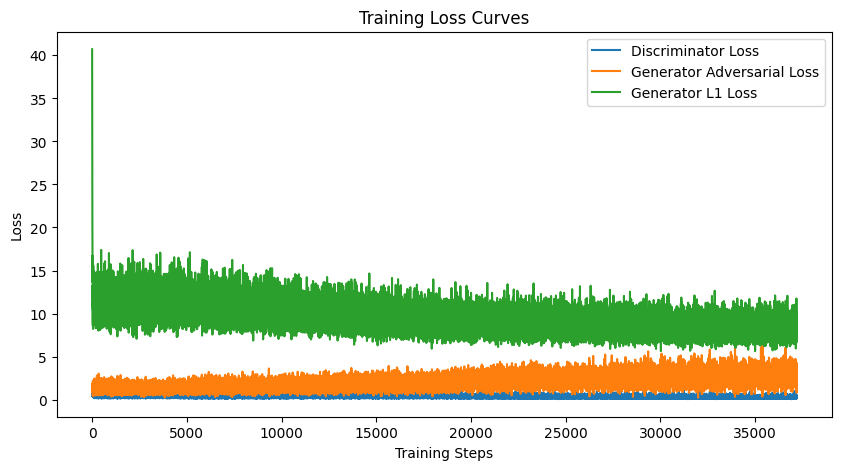

In [ ]:


# =====================
# Initialize Models and Optimizers
# =====================
# Initialize lists for logging losses
losses_D = []
losses_G = []
losses_L1 = []

# Create output folder for saving generated images
os.makedirs("output_images", exist_ok=True)

# Instantiate the models
G = GeneratorUNet(in_channels=3, out_channels=3).to(device)
D = Discriminator(in_channels=3).to(device)

# Initialize weights
G.apply(initialize_weights)
D.apply(initialize_weights)

# Define optimizers
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(b1, b2))
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(b1, b2))

# =====================
# Define Missing Variables
# =====================
log_interval = 100          # Frequency of logging training progress
save_interval = 10          # Frequency (in epochs) of saving model checkpoints
lambda_L1 = 100.0           # Weight for L1 loss

# =====================
# Training Loop
# =====================
for epoch in range(num_epochs):
    for i, data in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        real_A = data['A'].to(device)  # Original images (ground truth)
        real_B = data['B'].to(device)  # Segmented images (input)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Generate fake images from the generator
        fake_A = G(real_B)

        # Discriminator evaluates real and fake images
        real_output = D(real_B, real_A)         # Real pair
        fake_output = D(real_B, fake_A.detach())  # Fake pair

        # Compute discriminator loss
        d_loss = discriminator_loss(real_output, fake_output)
        d_loss.backward()
        optimizer_D.step()

        # ---------------------
        #  Train Generator
        # ---------------------
        optimizer_G.zero_grad()

        # Generate fake images
        fake_A = G(real_B)

        # Discriminator evaluates the fake images
        fake_output = D(real_B, fake_A)

        # Compute generator adversarial loss
        g_adv_loss = generator_loss(fake_output)

        # Compute L1 loss
        g_l1_loss = l1_loss(fake_A, real_A, lambda_l1=lambda_L1)

        # Total generator loss
        g_total_loss = g_adv_loss + g_l1_loss
        g_total_loss.backward()
        optimizer_G.step()

        # Log the losses
        losses_D.append(d_loss.item())
        losses_G.append(g_adv_loss.item())
        losses_L1.append(g_l1_loss.item())

        # Print training progress
        if i % log_interval == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(train_dataloader)}]")
            print(f"D Loss: {d_loss.item():.4f}, G Total Loss: {g_total_loss.item():.4f}, "
                  f"G Adv Loss: {g_adv_loss.item():.4f}, G L1 Loss: {g_l1_loss.item():.4f}")

    # Save models every save_interval epochs
    if (epoch + 1) % save_interval == 0:
        torch.save(G.state_dict(), f"generator_epoch_{epoch+1}.pth")
        torch.save(D.state_dict(), f"discriminator_epoch_{epoch+1}.pth")
        print(f"Saved models at epoch {epoch+1}")

    # Save output images every epoch (optional: adjust as needed)
    G.eval()  # Set generator to evaluation mode
    with torch.no_grad():
        for test_data in test_dataloader:
            test_real_A = test_data['A'].to(device)  # Original image
            test_real_B = test_data['B'].to(device)  # Segmentation (input)
            test_fake_A = G(test_real_B)  # Generated original image

            # Convert tensors to numpy arrays for visualization
            real_A_np = test_real_A.cpu().permute(0, 2, 3, 1).numpy()
            real_B_np = test_real_B.cpu().permute(0, 2, 3, 1).numpy()
            fake_A_np = test_fake_A.cpu().permute(0, 2, 3, 1).numpy()

            # Denormalize if images are normalized to [-1, 1]
            real_A_np = (real_A_np * 0.5) + 0.5
            real_B_np = (real_B_np * 0.5) + 0.5
            fake_A_np = (fake_A_np * 0.5) + 0.5

            # Clip values to [0,1] to avoid potential artifacts
            real_A_np = np.clip(real_A_np, 0, 1)
            real_B_np = np.clip(real_B_np, 0, 1)
            fake_A_np = np.clip(fake_A_np, 0, 1)

            # Plot the segmentation input, generated image, and target image side by side
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(real_B_np[0])
            axs[0].set_title("Segmented Input (B)")
            axs[1].imshow(fake_A_np[0])
            axs[1].set_title("Generated Original (Fake A)")
            axs[2].imshow(real_A_np[0])
            axs[2].set_title("Real Original (A)")
            for ax in axs:
                ax.axis("off")
            plt.tight_layout()
            plt.savefig(f"output_images/epoch_{epoch+1}.png")
            plt.close()
            break  # Save one batch only
    G.train()  # Set generator back to training mode

# =====================
# Plot Loss Curves
# =====================
plt.figure(figsize=(10, 5))
plt.plot(losses_D, label="Discriminator Loss")
plt.plot(losses_G, label="Generator Adversarial Loss")
plt.plot(losses_L1, label="Generator L1 Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.savefig("output_images/loss_curves.png")
plt.show()
